### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Math, display
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, \
                                    GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
                            f1_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Given Dataset:

In [2]:
attrition_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Dataframe Shape:

In [3]:
attrition_df.shape

(1470, 35)

### Dataframe columns description and corresponding datatype:

In [4]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Converting object type to categorical datatype:

In [5]:
col = ''
for col in attrition_df.columns:
    if attrition_df[col].dtype == 'object':
        attrition_df[col] = attrition_df[col].astype('category')

### Dataframe columns datatype:

In [6]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

Memory consumption reduces to 313.1 KB from 402.1+ KB

### Checking whether dataframe contains any NaN value or not:

In [7]:
attrition_df.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Checking whether there exists any duplicate row in dataframe:

In [8]:
attrition_df.duplicated(keep='first').sum(axis=0)

0

### High level visualization of Numerical Columns of given dataframe:

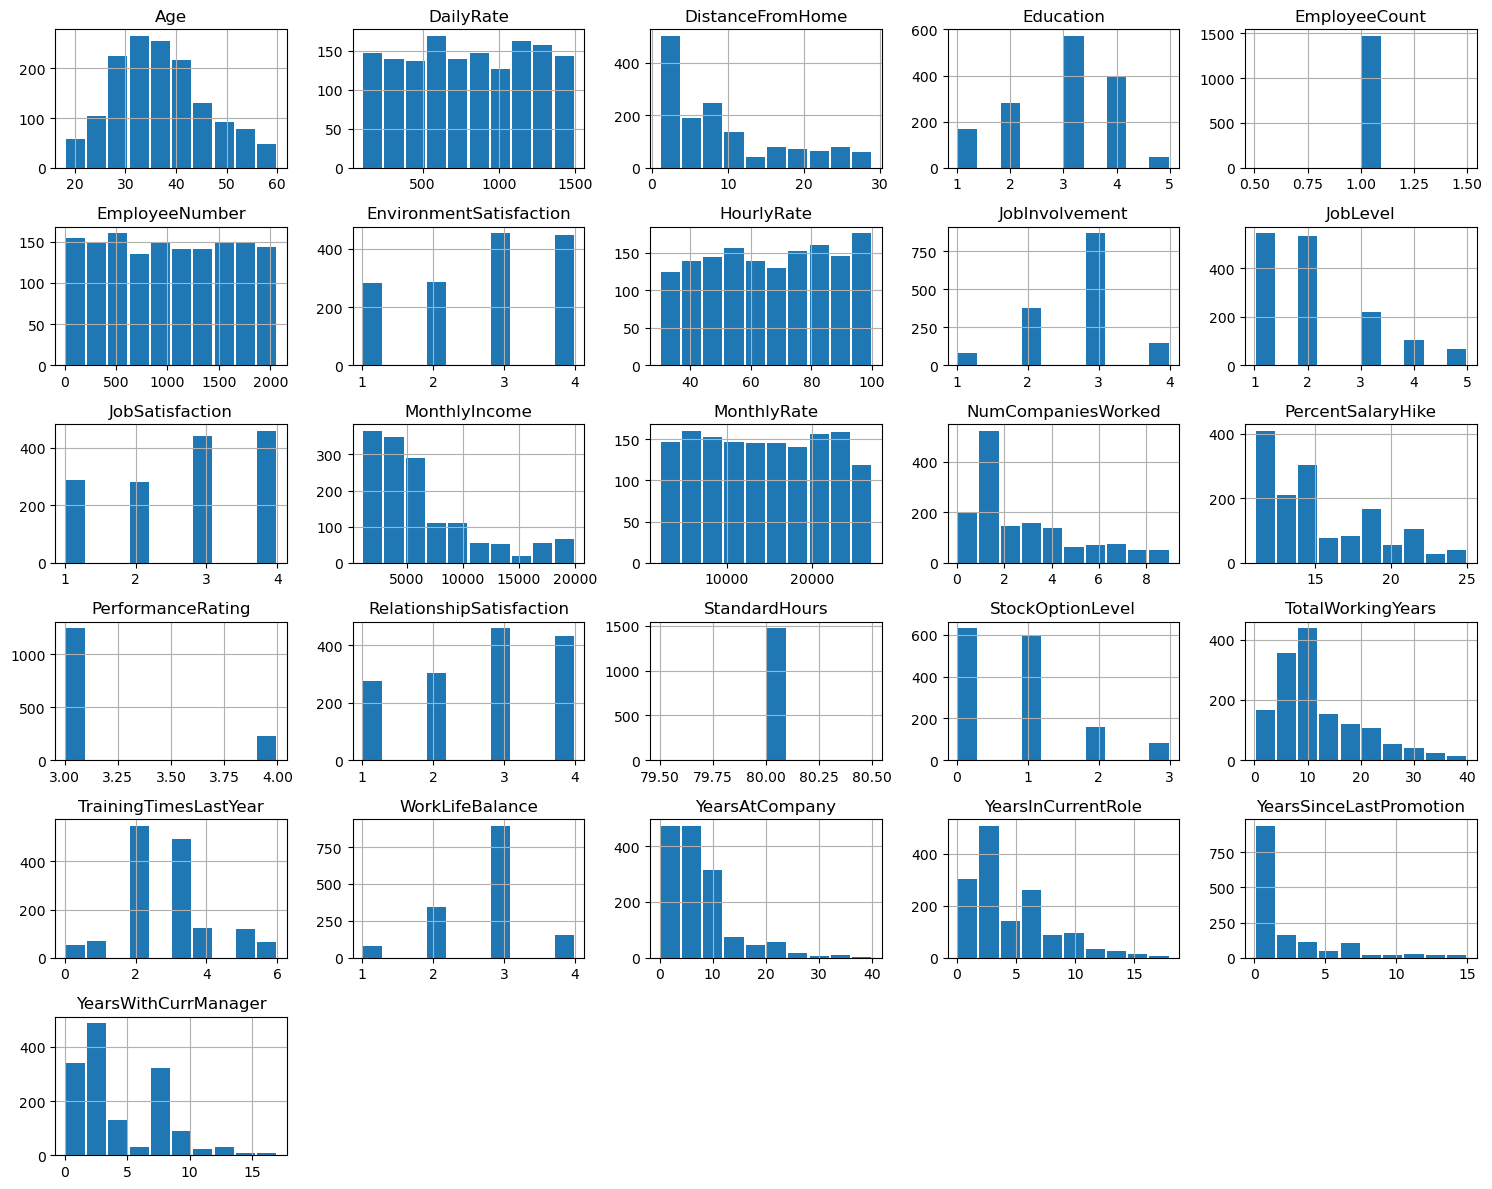

In [9]:
attrition_df.hist(rwidth=0.9, figsize=(15,12))
plt.tight_layout();

### Creating duplicate copy of Original Dataframe:

In [10]:
df1 = attrition_df.copy()

In [11]:
df1['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [12]:
df1['EmployeeNumber'].value_counts().sort_index()

1       1
2       1
4       1
5       1
7       1
       ..
2061    1
2062    1
2064    1
2065    1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [13]:
df1['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [14]:
df1['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

### Elimination of columns based on intution:

In [15]:
df1.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

### Checking shape of dataframe after removal of 2 columns:

In [16]:
df1.shape

(1470, 31)

In [17]:
continuous_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
                   'YearsSinceLastPromotion', 'YearsWithCurrManager']

categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 
                    'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'Attrition']

categorical_input_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
                     'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 
                     'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 
                     'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

categorical_output_cols = 'Attrition'

print(f'Total number of Numerical Input Features = {len(continuous_cols)}')
print('Total number of Categorical Input Features = {}' .format(len(categorical_input_cols)))
print('Number of Output Feature = 1')

Total number of Numerical Input Features = 14
Total number of Categorical Input Features = 16
Number of Output Feature = 1


### Statistical Parameter Analysis of dataframe:

In [18]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Mean age of the employees documented in the dataset is 36.92. <br>The average Environment-Satisfation rating 2.72

## Exploratory Data Analysis for Attrition Dataset:

### Visualization of Overall Attrition Rate:

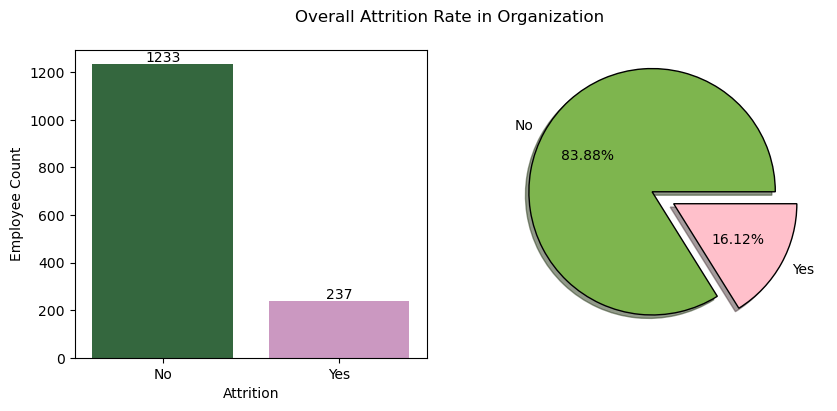

In [19]:
plt.figure(figsize=(10,4))
c = ['#7eb54e','pink']
ax1 = plt.subplot(1,2,1)
sns.countplot(data=df1, x='Attrition', ax=ax1, palette='cubehelix');
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_ylabel('Employee Count')

ax2 = plt.subplot(1,2,2)
df1['Attrition'].value_counts().plot(kind='pie', autopct='%0.2f%%', explode=[0.2,0], shadow=True, 
                                     figsize=(10,4), colors=c, wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.suptitle('Overall Attrition Rate in Organization');

Out of 1470 employees almost 84% people are staying with the company and only 16% people have left.
It clearly shows an imbalanced dataset.

### Visualization of Attrition Rate based on Gender:

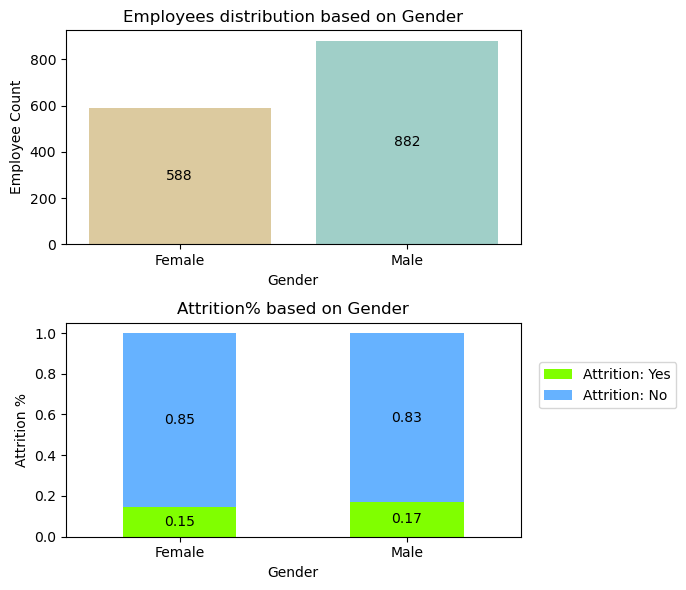

In [20]:
c=ax=ax1=label=0
plt.figure(figsize=(7,6))

ax1 = plt.subplot(2,1,1)
ax = sns.countplot(data=df1, x='Gender', ax=ax1, palette='BrBG')
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.int64(label), label_type='center')
ax1.set_title('Employees distribution based on Gender')
ax1.set_ylabel('Employee Count')
    
c=ax2=ax=label=0
ax2 = plt.subplot(2,1,2)
df2=pd.DataFrame()
df2 = df1.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax = df2.plot(kind='bar', stacked='True', figsize=(7,6), color=['#80FF00','#66B2FF'], ax=ax2)
plt.xticks(rotation=0)
ax2.set_title('Attrition% based on Gender')
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.round(label,2), label_type='center')
ax2.set_ylabel('Attrition %')
ax2.legend(['Attrition: Yes', 'Attrition: No'],loc=(1.04,0.6))

plt.tight_layout();

From above plot; we can see attrition rate is slighter high for males compared to females.

### Visualizing Monthly Income based on Gender:

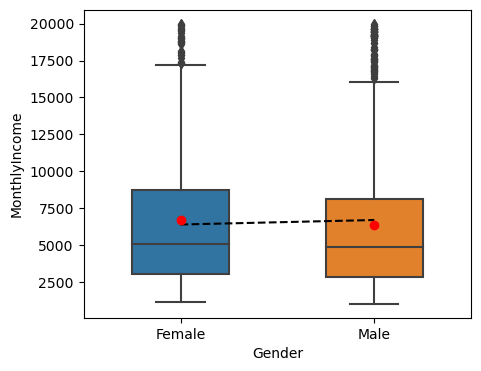

In [21]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df1, y='MonthlyIncome', x='Gender', showmeans=True, width=0.5,
            meanprops = {'marker': 'o', 'markerfacecolor' : 'red', 'markeredgecolor' : 'red'})

male_monthly_income_mean = df1[df1['Gender'] == 'Male']['MonthlyIncome'].mean()
female_monthly_income_mean = df1[df1['Gender'] == 'Female']['MonthlyIncome'].mean()
sns.lineplot(data=pd.Series([male_monthly_income_mean, female_monthly_income_mean]), 
             color='black', ls="--");

Both genders are equal wrt income level.

### Visualization of Attrition Rate based on Marital Status:

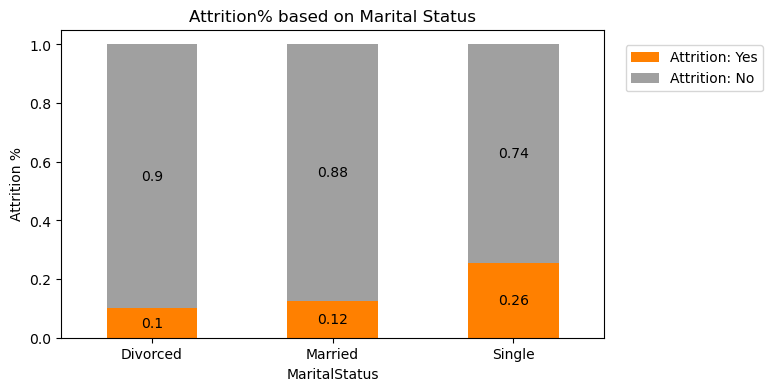

In [22]:
c=ax=label=0
df2=pd.DataFrame()

df2 = df1.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax = df2.plot(kind='bar', stacked='True', figsize=(7,4), color=['#FF8000','#A0A0A0'])
plt.xticks(rotation=0)
plt.title('Attrition% based on Marital Status')
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.round(label,2), label_type='center')
plt.ylabel('Attrition %')
plt.legend(['Attrition: Yes', 'Attrition: No'],loc=(1.04,0.8));

People who are single are more prone towards attrition compared to divorced and married employees.

### Visualization of Attrition Rate based on Business Travel:

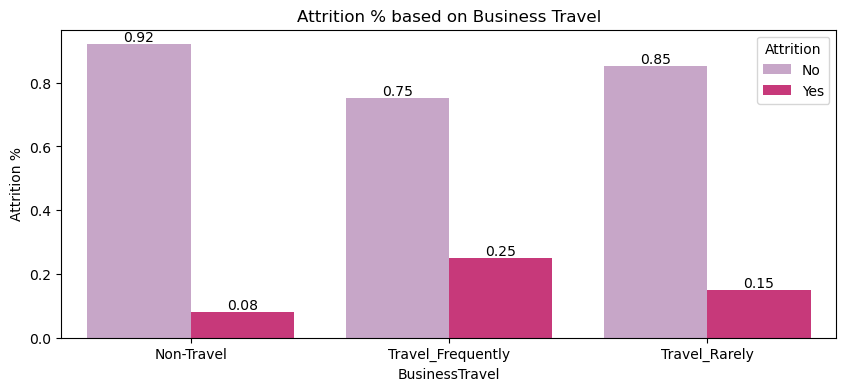

In [23]:
c=ax=0
df2 = pd.DataFrame()
plt.figure(figsize=(10,4))

df2 = df1.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).rename('Attrition %').reset_index()
ax = sns.barplot(data=df2, x='BusinessTravel', y='Attrition %', hue='Attrition', palette='PuRd')
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.round(label,2))
plt.title('Attrition % based on Business Travel');

Most employees who travel frequently have higher attrition %. Improving these reasons, could improve the attrition rate:
* One reason may be, employees are not getting best travel experience on the way.
* Another reason could be, onsite facilities are not good.


### Visualization of Attrition Rate based on working overtime:

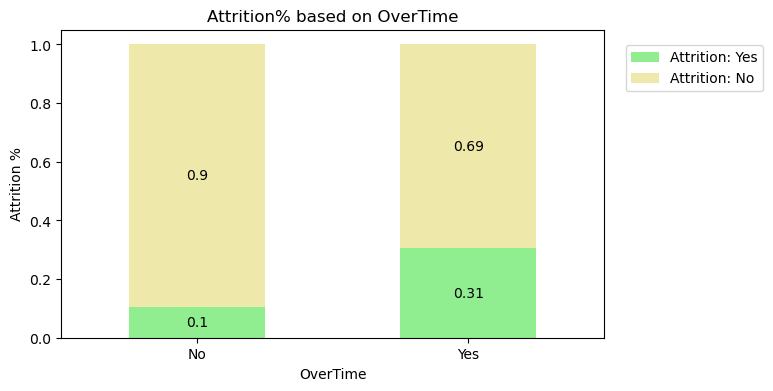

In [24]:
c=ax=label=0
df2=pd.DataFrame()

df2 = df1.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax = df2.plot(kind='bar', stacked='True', figsize=(7,4), color=['#90EE90','#EEE8AA'])
plt.xticks(rotation=0)
plt.title('Attrition% based on OverTime')
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.round(label,2), label_type='center')
plt.ylabel('Attrition %')
plt.legend(['Attrition: Yes', 'Attrition: No'],loc=(1.04,0.8));

Working a lot of overtime is also an import reason behind attrition rate. It can be noticed employees are more likely to leave when they did overtime.

### Visualization of Attrition w.r.t Percent Salary Hike:

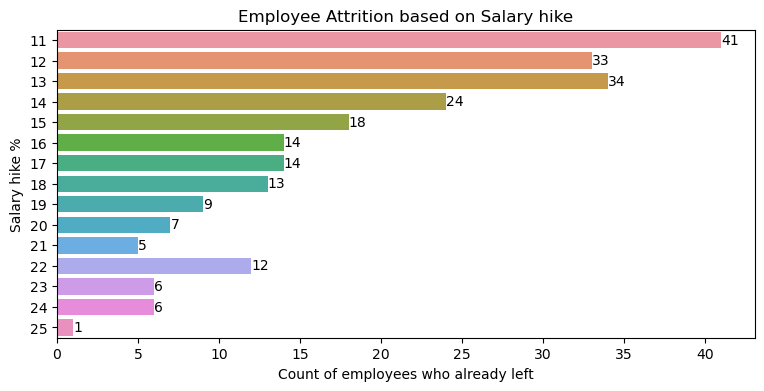

In [25]:
df2 = pd.DataFrame()
c=mean=label=ax=0
df2 = df1.groupby('PercentSalaryHike')['Attrition'].value_counts().rename('emp count').reset_index()
df2 = df2[df2['Attrition']=='Yes']
df2 = df2.drop(['Attrition'], axis=1)
mean = np.mean(df2['emp count'])
plt.figure(figsize=(9,4))
ax = sns.barplot(data=df2, y='PercentSalaryHike', x='emp count', orient='h')
for c in ax.containers:
    label = [v.get_width() for v in c]
    ax.bar_label(c, labels=np.int64(label))
plt.xlabel('Count of employees who already left')
plt.ylabel('Salary hike %')
plt.title('Employee Attrition based on Salary hike');

From the above distribution plot, we can infer that Employee who get average hike between 11% to 13% are leaving more compared to who are in high salary hike bracket.

### Visualization of Attrition based on Total Working Years and Monthly Income:

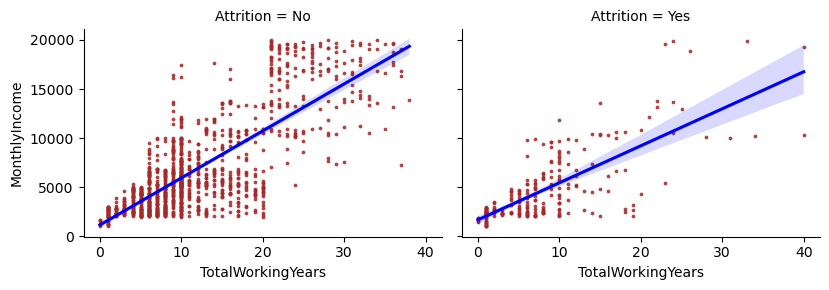

In [26]:
sns.lmplot(data=df1, x='TotalWorkingYears', y='MonthlyIncome',  col='Attrition', height=3, aspect=1.4,
           scatter_kws={'s':3, 'color':'brown'}, line_kws={'color':'blue'});

* Currently in company; there is a huge number of people with less experience compared to experienced ones.
* From 1st graph; we can see as experience increases, MonthlyIncome also increases.
* From 2nd graph, we can see the people who have left company; they are mostly freshers or less experienced people and also they were earning less salary.
* Very less senior people have left company who were earning high salary.

### Visualization of Attrition based on Distance from home:

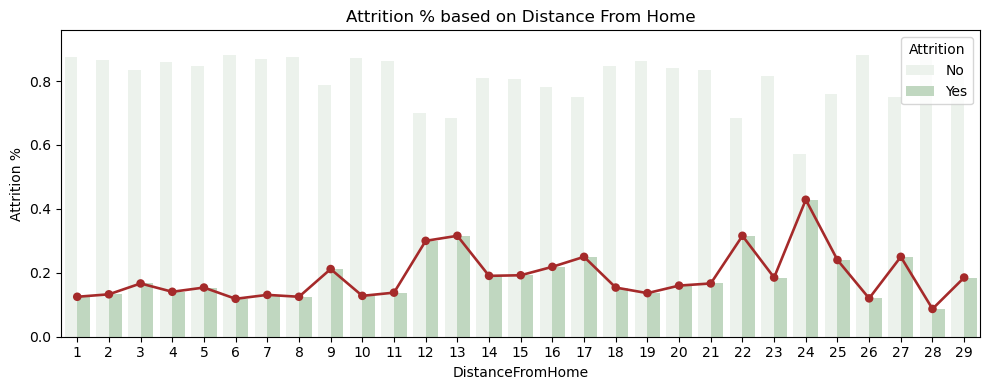

In [27]:
df2 = pd.DataFrame()
plt.figure(figsize=(10,4))

df2 = df1.groupby('DistanceFromHome')['Attrition'].value_counts(normalize=True).rename('Attrition %').reset_index()
sns.barplot(data=df2, x='DistanceFromHome', y='Attrition %', hue='Attrition', 
            palette=sns.light_palette((145,280,40), input='husl'))
sns.pointplot(data=df2[df2['Attrition']=='Yes'], x='DistanceFromHome', y='Attrition %', color = 'brown', scale=0.7)
plt.title('Attrition % based on Distance From Home')
plt.tight_layout();

Most people tend to leave when distance from home is more than 8 km.

### Visualization of Attrition w.r.t Daily Rate:

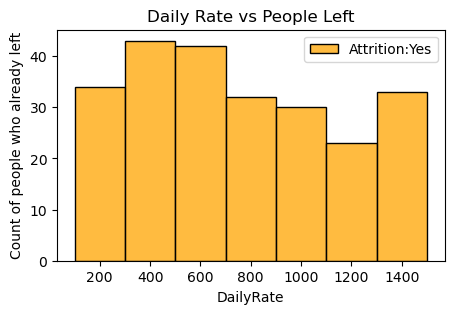

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(data=df1[df1['Attrition']=='Yes'], x='DailyRate', 
             bins=[100,300,500,700,900,1100,1300,1500], color = 'orange', label='Attrition:Yes');
plt.legend()
plt.title('Daily Rate vs People Left')
plt.ylabel('Count of people who already left');

we can say that employees with a Daily rate in between 300 and 500 resign/retire more when compared to other Daily rates.

### Visualization of Attrition w.r.t Environment Satisfaction:

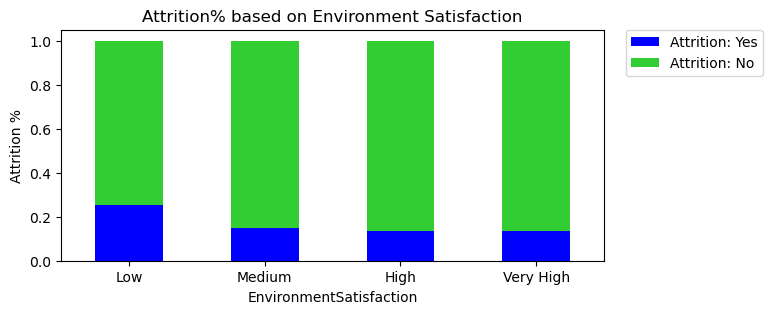

In [29]:
df2=pd.DataFrame()
df2 = df1.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax = df2.plot(kind='bar', stacked='True', figsize=(7,3), color=['#0000FF','#32CD32'])
plt.xticks(rotation=0)
plt.title('Attrition% based on Environment Satisfaction')
plt.ylabel('Attrition %')
env = ['Low','Medium','High','Very High']
ax.set(xticks=range(len(env)), xticklabels=[i for i in env])
plt.legend(['Attrition: Yes', 'Attrition: No'],loc=(1.04,0.8));

As expected, poor environment satisfaction leads towards more attrition.

### Visualization of Attrition Rate based on Age:

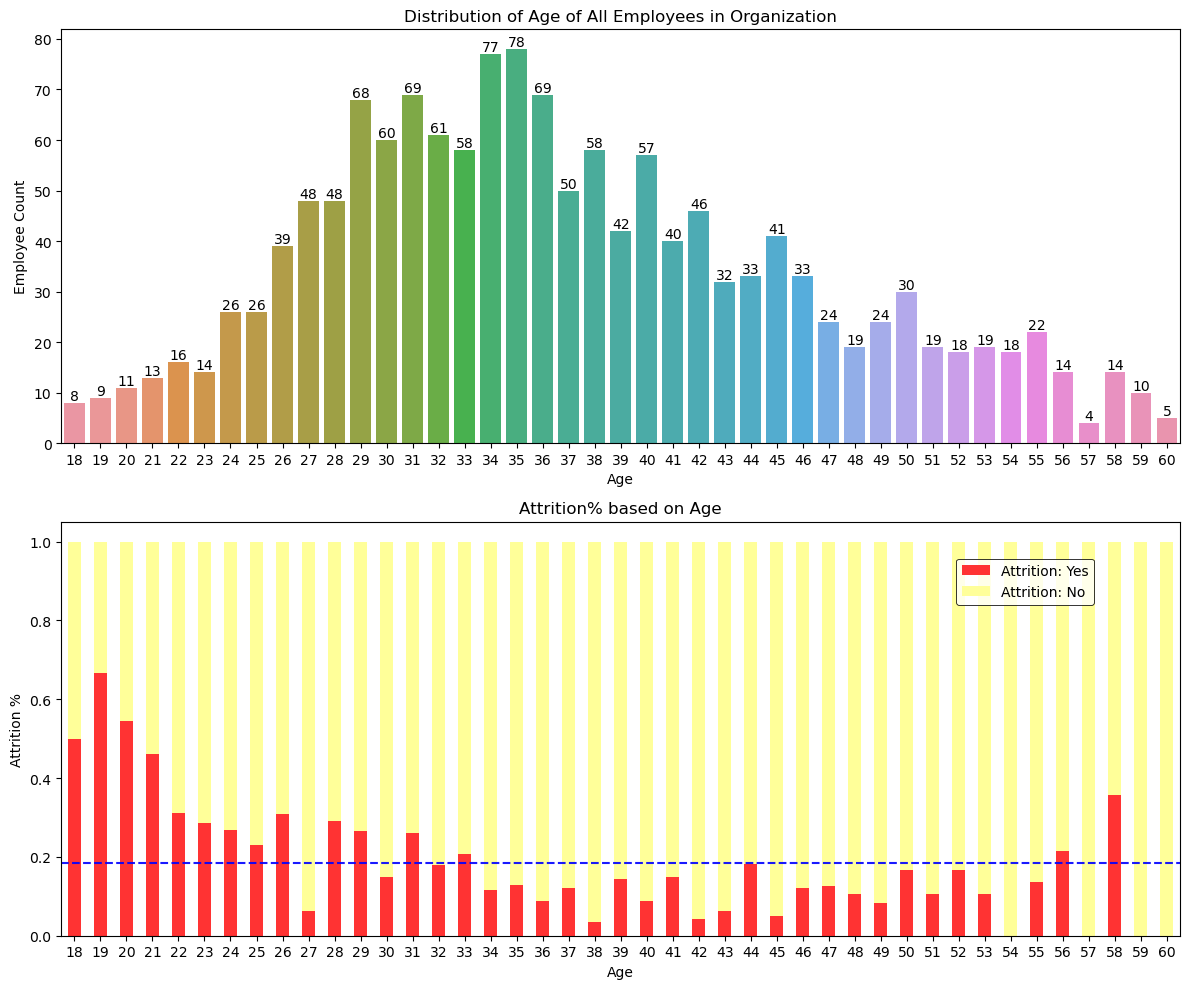

In [30]:
c=ax=ax1=ax2=0
df2 = pd.DataFrame()

plt.figure(figsize=(12,10))
ax1 = plt.subplot(2,1,1)
ax = sns.countplot(data=df1, x='Age', ax=ax1)
for c in ax.containers:
    ax.bar_label(c)
ax1.set_ylabel('Employee Count')
ax1.set_title('Distribution of Age of All Employees in Organization');

ax2 = plt.subplot(2,1,2)
df2 = df1.groupby('Age')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
df2.plot(kind='bar', stacked=True, figsize=(12,10), color=['#FF3333','#FFFF99'], ax=ax2)
plt.xticks(rotation=0)
ax2.set_title('Attrition% based on Age')
ax2.set_ylabel('Attrition %')
leg = ax2.legend(['Attrition: Yes', 'Attrition: No'],loc=(0.8,0.8))
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.7)
ax2.axhline(y=np.mean(df2['Yes']), ls='--', c='b', alpha=0.9)

plt.tight_layout();

* From Age Distribution, we can see significant number of employees exist within the age range of 26 to 45 years.<br>
* From Attrition%, we can see younger people (within age range of 18-33) has highest attrition rate. May be it is due to they are young so looking for alternate opportunities.<br>Whereas people with age >= 34 are staying in company. But we can see there is a high attrition rate for people of aged 56 years and 58 years.

### Another Possible Reason behind higher attrition rate for Younger People:

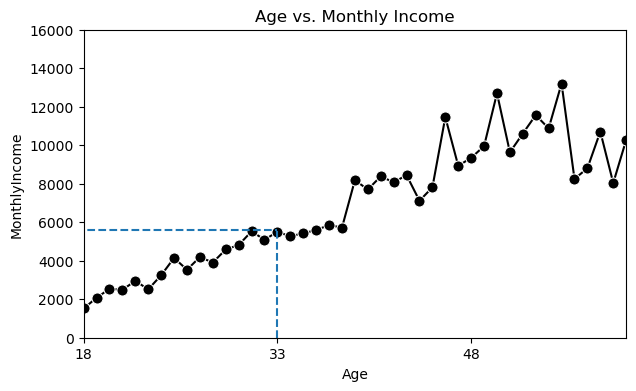

In [31]:
plt.figure(figsize=(7,4))
sns.lineplot(data=df1, x='Age', y='MonthlyIncome', c='black', marker='o', markersize=8, errorbar=None)
plt.ylim([0,16000])
plt.xlim([18,60])
plt.vlines(x=33, ymin= 0, ymax= 5600, ls='--')
plt.hlines(y=5600, xmin=0, xmax= 33, ls='--')
plt.title('Age vs. Monthly Income')
plt.xticks(np.arange(18,60,15));

for age group of 18-33; we can see the monthly income lies in between 2000 to 6000; due to low salary structure; may be people are leaving.

### Visualization of Attrition Rate based on Department:

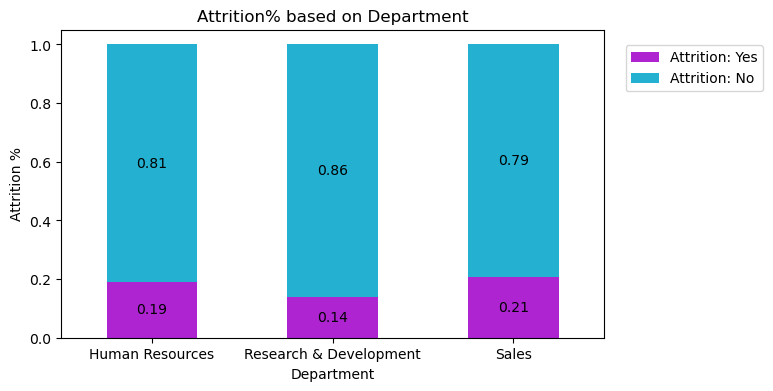

In [32]:
c=ax1=label=0
df2=pd.DataFrame()

df2 = df1.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax1 = df2.plot(kind='bar', stacked='True', figsize=(7,4), color=['#ae24d1','#24b1d1'])
plt.xticks(rotation=0)
plt.title('Attrition% based on Department')

for c in ax1.containers:
    label = [v.get_height() for v in c]
    ax1.bar_label(c, labels=np.round(label,2), label_type='center')

plt.ylabel('Attrition %')
plt.legend(['Attrition: Yes', 'Attrition: No'],loc=(1.04,0.8));

Among 3 departments, HR & Sales departments are comparatively showing higher attrition rate.

### Visualization of Work-Life balance based on Department:

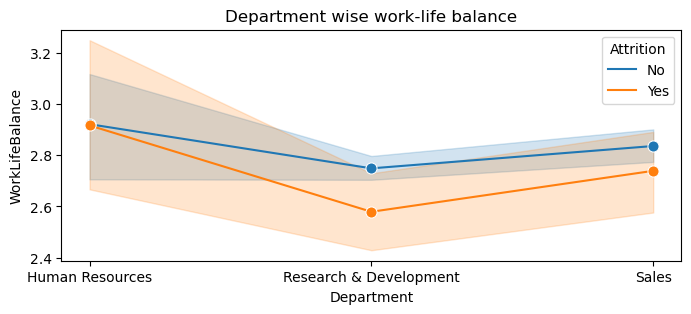

In [33]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df1, x='Department', y= 'WorkLifeBalance', hue='Attrition', marker='o', markersize=8)
plt.title('Department wise work-life balance');

* Based on the data, HR department have the most stable work life balance compared to RnD and Sales departments.
* People who resigned from Sales & RnD departments, they had comparatively lower worki-life balance.

### Visualization of Attrition Rate based on Job Role:

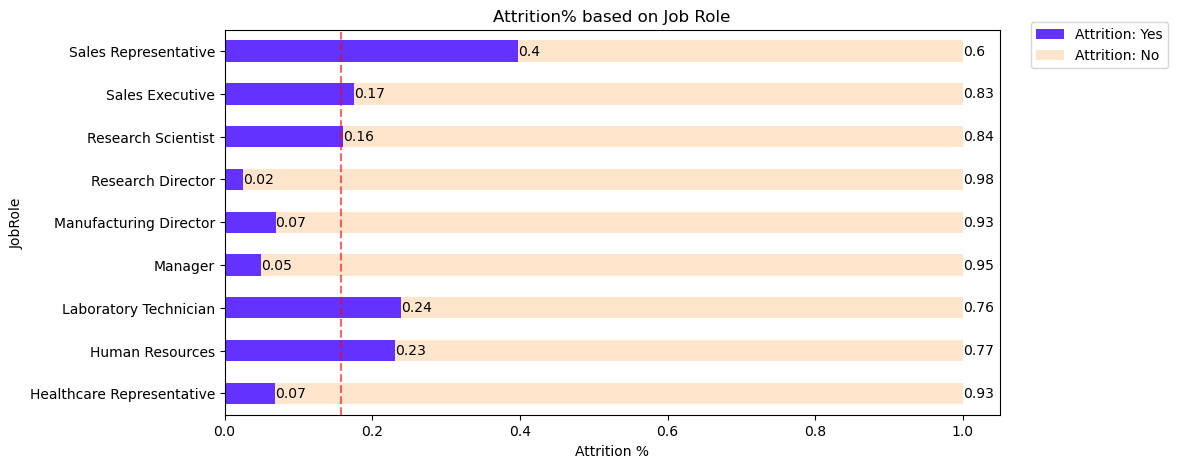

In [34]:
c=ax=label=0
df2=pd.DataFrame()

df2 = df1.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax = df2.plot(kind='barh', stacked=True, figsize=(10,5), color=['#6432FF','#FFE5CC'])
plt.title('Attrition% based on Job Role')

for c in ax.containers:
    label = [v.get_width() for v in c]
    ax.bar_label(c, labels=np.round(label,2))

plt.xlabel('Attrition %')
plt.legend(['Attrition: Yes', 'Attrition: No'], loc=(1.04,0.9))
plt.axvline(x=np.mean(df2['Yes']), c='r', ls='--', alpha=0.6);

Between 9 different job roles, 'Sales Representatives' are having tremendous high attrition rate followed by other 3 job roles: 'Laboratory Technician', 'HR' & 'Sales Executive'.

### Visualization of Monthly Income across Job Roles:

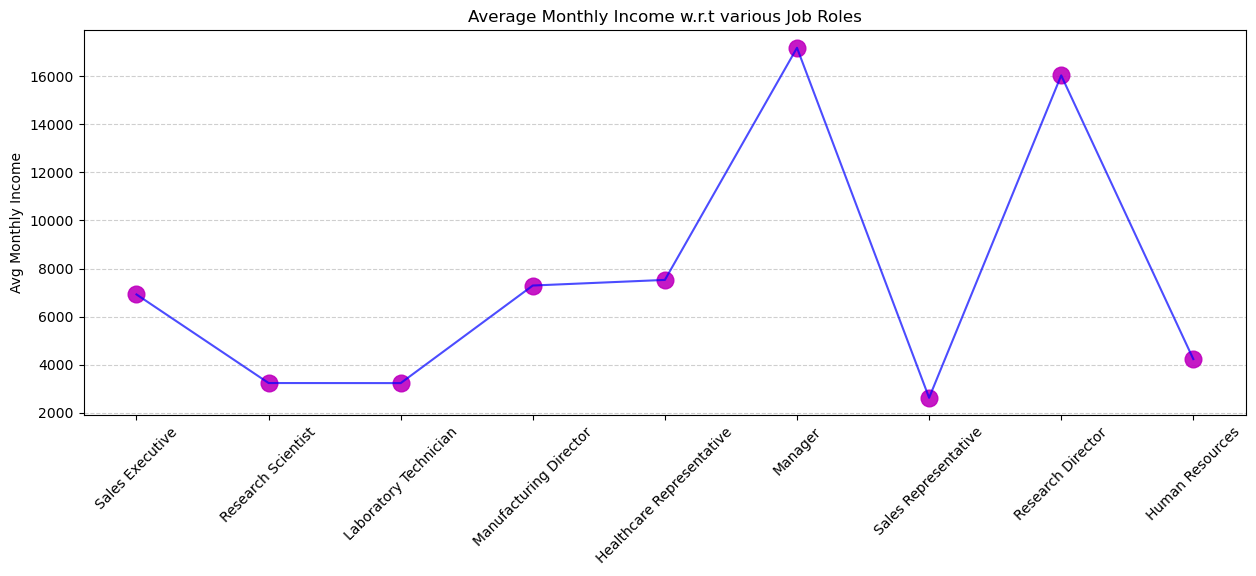

In [35]:
plt.figure(figsize=(15,5))
l=0
l1 = l2 = l3 = []
l1 = df1['JobRole'].value_counts().index
l2 = np.arange(1,len(l1)+1)
for l in l1:
    l3.append(df1[df1['JobRole'] == l]['MonthlyIncome'].mean())
plt.plot(l2, l3, 'mo', alpha=0.9, markersize = 12)
plt.plot(l2, l3, 'b-', alpha=0.7)
plt.xticks(l2,l1)
plt.xticks(rotation=45)
plt.grid(axis='y', ls='--', alpha=0.6)
plt.ylabel('Avg Monthly Income')
plt.title('Average Monthly Income w.r.t various Job Roles');

* Among all job roles; 'Sales Representative' having the lowest monthly income (<3000). It may be considered as a vital reason behind the highest attrition rate in this particular job role.<br>        'Research Scientis' & 'Laboratory Technicians' are having 2nd lowest but equal monthly income (around 3000).<br> 
* On the otherhand 'Managers' are having highest avg monthly income.

### Visualization of Distance from home & Job Satisfaction based on Individual Departments:

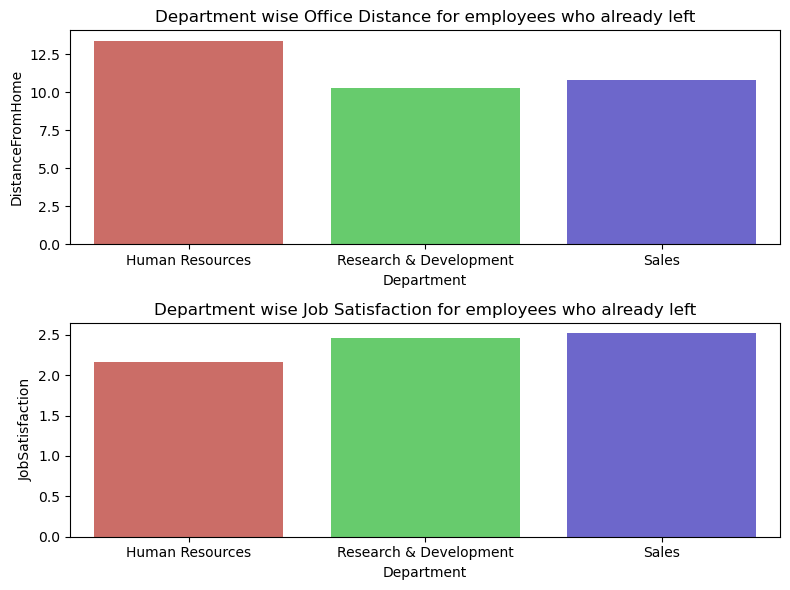

In [36]:
df2 = pd.DataFrame()
ax1=ax2=0
df2 = df1[['Attrition','Department','JobSatisfaction','DistanceFromHome']]
df2 = df2[df2['Attrition']=='Yes']

plt.figure(figsize=(8,6))
ax1=plt.subplot(2,1,1)
sns.barplot(data=df2, x='Department', y='DistanceFromHome', errorbar=None, ax=ax1, palette='hls')
ax1.set_title('Department wise Office Distance for employees who already left')

ax2=plt.subplot(2,1,2)
sns.barplot(data=df2, x='Department', y='JobSatisfaction', errorbar=None, ax=ax2, palette='hls')
ax2.set_title('Department wise Job Satisfaction for employees who already left')
plt.tight_layout();

From here we can infer the reason behind HR attrition:
* For HRs, office location is too far (avg 13.5 km) from their base location. That's why; job satisfaction among them is comparatively less than other departments.

### Visualization of Overtime across Job Roles:

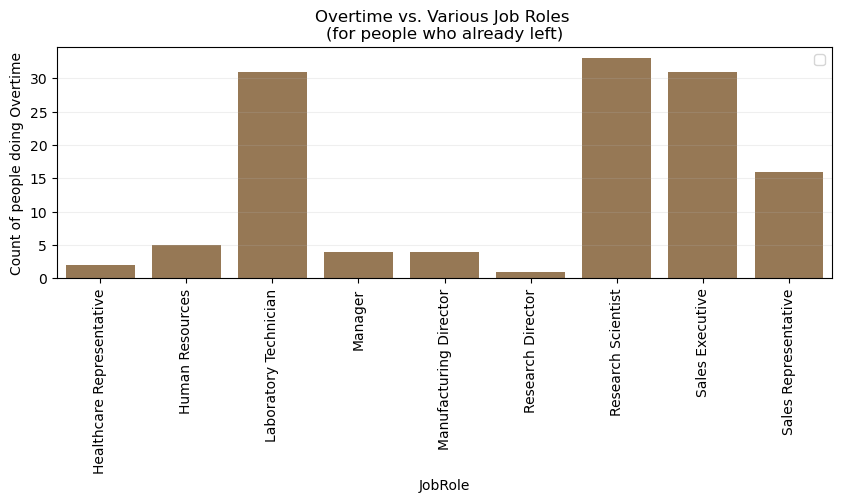

In [37]:
df2= pd.DataFrame()
df2 = df1[(df1['Attrition']=='Yes')].copy()
JobRole_list = df2['JobRole'].cat.codes.value_counts().index
OverTime_list = df2['OverTime'].cat.codes.value_counts().index
JobRole_values = df2['JobRole'].value_counts().index
OverTime_values = df2['OverTime'].value_counts().index
df2['JobRole'] = df2['JobRole'].cat.codes
df2['OverTime'] = df2['OverTime'].cat.codes
# for i,j in zip(JobRole_values, JobRole_list):
#     print(i,' - ',j)
# print('')
# for k,l in zip(OverTime_values, OverTime_list):
#     print(k,' - ',l)
df2 = df2[df2['OverTime']==1]

plt.figure(figsize=(10,3))
sns.countplot(data=df2, hue='OverTime', x='JobRole', palette='cubehelix')
plt.xticks(rotation=90)
plt.ylabel('Count of people doing Overtime')
plt.xticks(JobRole_list, JobRole_values)
plt.legend('')
plt.grid(axis='y', alpha=0.2)
plt.title('Overtime vs. Various Job Roles \n(for people who already left)');

From above graph, we can see people from 'Laboratory Technician', 'Research Scientists' & 'Sales Executives' are doing overtime though their avg monthly income is on lower side. <br>
Thus it leads to another important reason behind huge attrition in 'Laboratory Technicians' & 'Sales Executive' Job Roles. 

### Visualization of Attrition Rate based on Education:

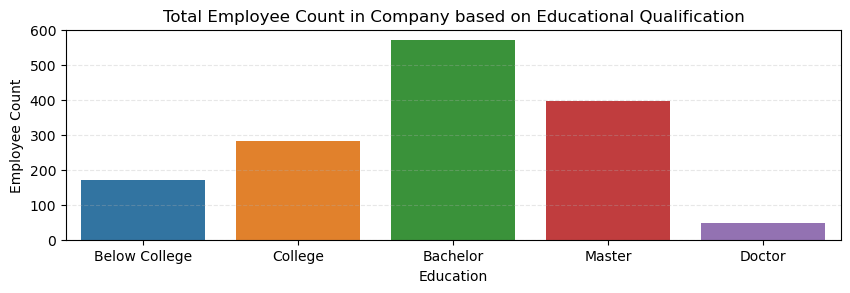

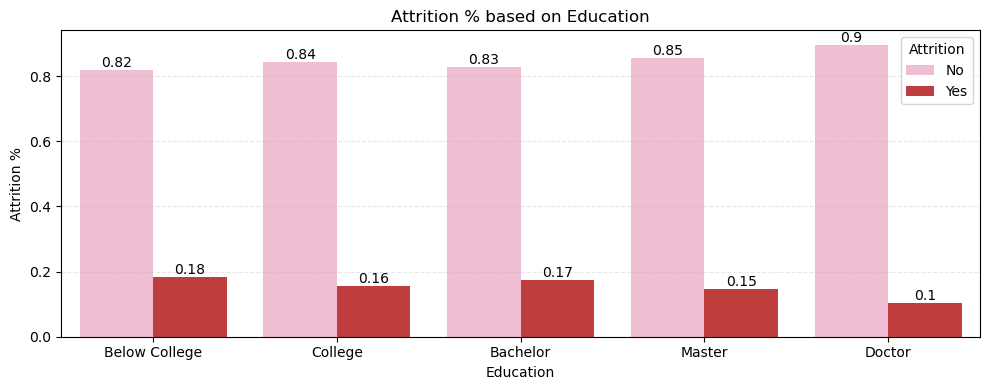

In [38]:
s1 = 0
df3 = pd.DataFrame()
plt.figure(figsize=(10,6))
s1 = df1['Education'].value_counts().sort_index()
df3 = s1.rename({1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}).reset_index()
ax1 = plt.subplot(2,1,1)
sns.barplot(data=df3, x='index', y='Education',ax=ax1)
ax1.grid(axis='y',alpha=0.3,ls='--')
ax1.set_xlabel('Education')
ax1.set_ylabel('Employee Count')
ax1.set_title('Total Employee Count in Company based on Educational Qualification');

i=ax=container=0
df2 = pd.DataFrame()
plt.figure(figsize=(10,4))
df2 = df1.groupby('Education')['Attrition'].value_counts(normalize=True).rename('Attrition %').reset_index()
ax = sns.barplot(data=df2, x='Education', y = 'Attrition %', hue='Attrition', palette='tab20_r')
plt.grid(axis='y',alpha=0.3, ls='--')
plt.title('Attrition % based on Education')
education = ['Below College','College','Bachelor','Master','Doctor']
ax.set(xticks=range(len(education)), xticklabels=[i for i in education])
for container in ax.containers:
    label = [v.get_height() for v in container]
    ax.bar_label(container, labels=np.round(label,2))
plt.tight_layout();

From 1st plot we can see, in company most of the people have the basic education of 'Bachelor' degree. <br>
But the attrition rate is most for people having basic educational qualification as 'Below College'.It may be because of not having any other degree to continue the job.

### Visualization of Attrition Rate based on Education Field:

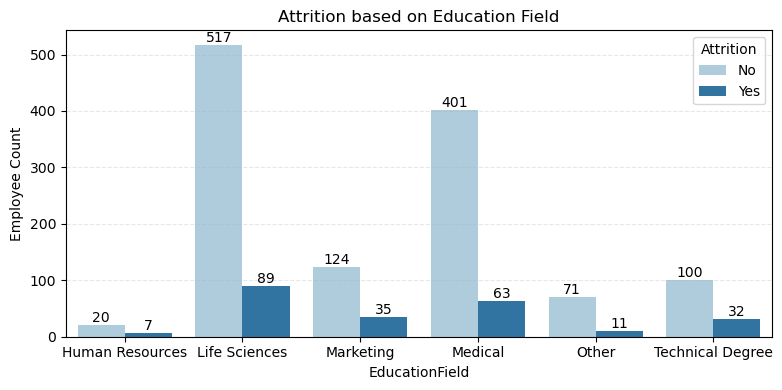

In [39]:
ax=container=0
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df1, x='EducationField', hue='Attrition', palette='Paired')
for container in ax.containers:
    ax.bar_label(container)

plt.grid(axis='y',alpha=0.3, ls='--')
plt.title('Attrition based on Education Field')
plt.ylabel('Employee Count')
plt.tight_layout();

We can see that employees with life science and medical degrees tend more for attrition, it could be because the higher degree level are not very attached to companies; may be they are facing slight discomfort in the workplace.

### Visualization of Attrition Rate based on Job Involvement:

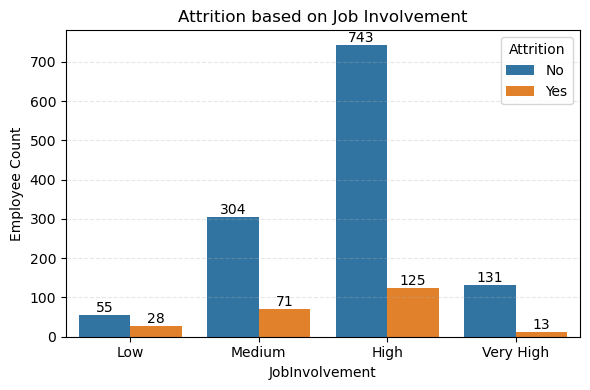

In [40]:
i=ax=container=0
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df1, x='JobInvolvement', hue='Attrition')
plt.grid(axis='y',alpha=0.3, ls='--')
plt.title('Attrition based on Job Involvement')

job = ['Low','Medium','High','Very High']
ax.set(xticks=range(len(job)), xticklabels=[i for i in job])

for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Employee Count')
plt.tight_layout();

* Majority of employees are showing high job involvement.
* It is obvious that employee with high involvement tend to leave more.
* May be reducing workload little bit and giving them free time to think about some innovation activities may reduce the attrition rate.


### Visualization of Attrition Rate based on Job Level:

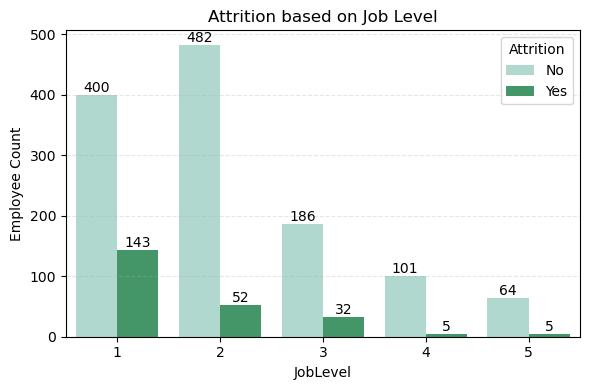

In [41]:
ax=container=0
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df1, x='JobLevel', hue='Attrition', palette='BuGn')
for container in ax.containers:
    ax.bar_label(container)

plt.grid(axis='y',alpha=0.3, ls='--')
plt.title('Attrition based on Job Level')
plt.ylabel('Employee Count')
plt.tight_layout();

Since entry level employee tend to leave more, so attrition is more in entry positions.

### Visualization of Attrition Rate based on Job Satisfaction:

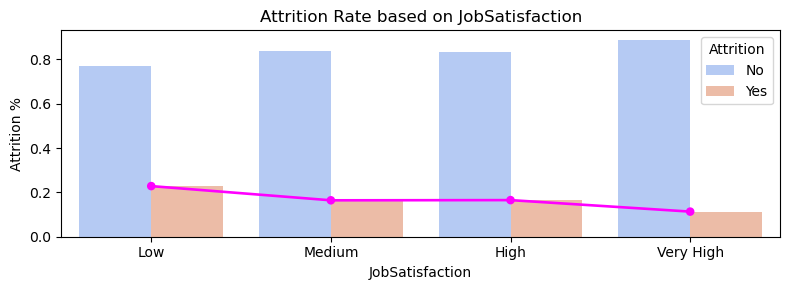

In [42]:
df2 = pd.DataFrame()
plt.figure(figsize=(8,3))
df2 = df1.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).rename('Attrition %').reset_index()
ax = sns.barplot(data=df2, x='JobSatisfaction', y='Attrition %', hue='Attrition', palette='coolwarm')
ax = sns.pointplot(data=df2[df2['Attrition']=='Yes'], x='JobSatisfaction', y='Attrition %', color = 'magenta', scale=0.7)

job_satis = ['Low','Medium','High','Very High']
ax.set(xticks=range(len(job_satis)), xticklabels=[i for i in job_satis])
plt.title('Attrition Rate based on JobSatisfaction')
plt.tight_layout();

Attrion rate decreases w.r.t increasing job satisfaction.

### Visualization of Attrition Rate based on Performance Rating:

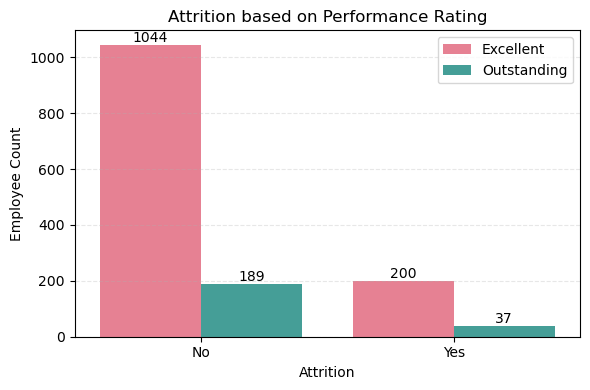

In [43]:
ax=container=0
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df1, x='Attrition', hue='PerformanceRating', palette='husl')
# ax = sns.barplot(data=df1, y='JobLevel', x ='PerformanceRating', hue='Attrition', palette='husl')
plt.grid(axis='y',alpha=0.3, ls='--')
plt.legend(['Excellent','Outstanding'])
plt.title('Attrition based on Performance Rating')

for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Employee Count')
plt.tight_layout();

Though there are total 4 buckets of rating: low, good, excellent & outstanding; we can see in given dataset all employees got rating as either Excellent or Outstanding.<br>
so we can conclude, there is no specific reason behind attrition based on Performance Rating.

### Visualization of Attrition Rate based on Relationship Satisfaction:

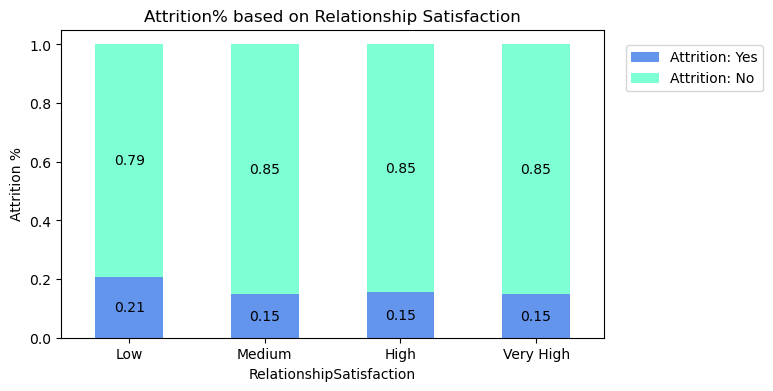

In [44]:
c=ax=label=0
df2=pd.DataFrame()
df2 = df1.groupby('RelationshipSatisfaction')['Attrition'].value_counts(normalize=True).unstack()
df2.sort_index(axis=1, ascending=False, inplace=True)
ax = df2.plot(kind='bar', stacked='True', figsize=(7,4), color=['#6495ED','#7FFFD4'])
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.round(label,2), label_type='center')

plt.xticks(rotation=0)
plt.ylabel('Attrition %')
plt.legend(['Attrition: Yes', 'Attrition: No'],loc=(1.04,0.8))
rel = ['Low','Medium','High','Very High']
ax.set(xticks=range(len(rel)), xticklabels=[i for i in rel])
plt.title('Attrition% based on Relationship Satisfaction');

People with low relationship satisfaction are more likely to leave.

### Visualization of Attrition Rate based on Stock Option Level:

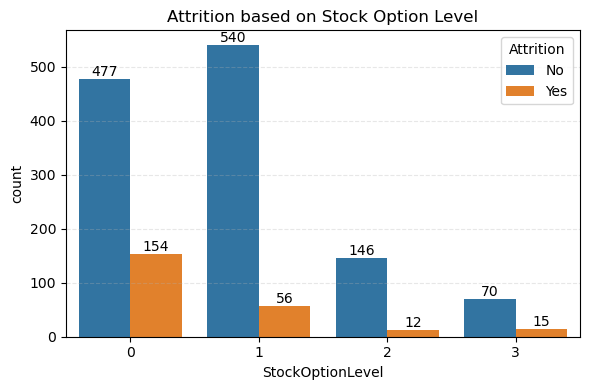

In [45]:
ax=container=0
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df1, x='StockOptionLevel', hue='Attrition')
plt.grid(axis='y',alpha=0.3, ls='--')
plt.title('Attrition based on Stock Option Level')

for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout();

From above plot; it can be unserstood that:
* Employee with less stock option leave company more often.
* Higher stock option is Inversely proportional to Attrition Rate.
* It means if company offers more stock options for the employees, they will be less likely towards attrition.

### Visualization of Attrition Rate based on Years with current Manager:

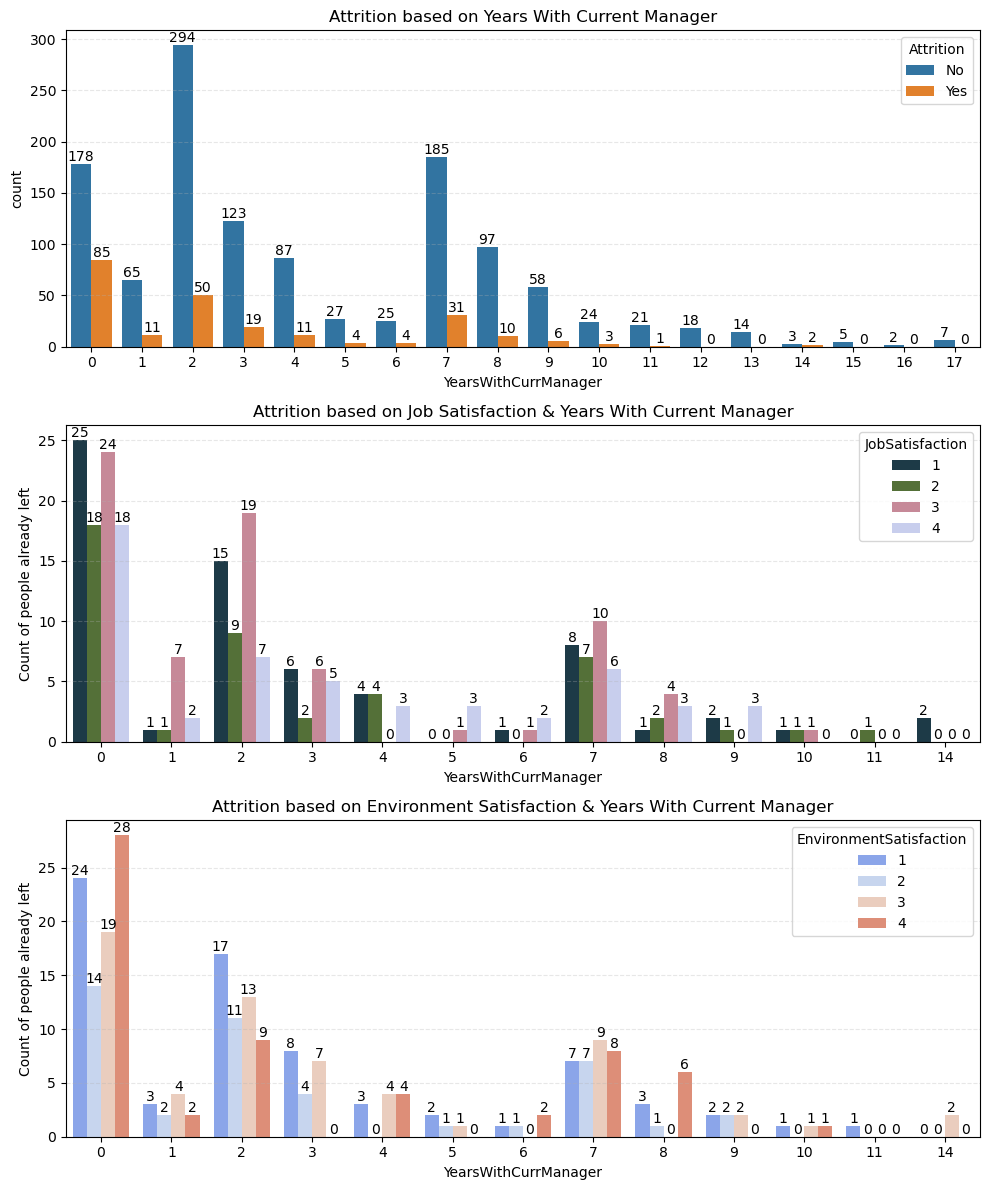

In [46]:
ax=ax1=ax2=ax3=container=0
plt.figure(figsize=(10,12))
ax1 = plt.subplot(3,1,1)
ax = sns.countplot(data=df1, x='YearsWithCurrManager', hue='Attrition', ax=ax1) 
ax1.grid(axis='y',alpha=0.3, ls='--')
ax1.set_title('Attrition based on Years With Current Manager')
for container in ax.containers:
    ax.bar_label(container)

ax2 = plt.subplot(3,1,2)
ax= sns.countplot(data=df1[df1['Attrition']=='Yes'], x='YearsWithCurrManager', hue='JobSatisfaction', ax=ax2, palette='cubehelix')
ax2.grid(axis='y',alpha=0.3, ls='--')
ax2.set_ylabel('Count of people already left')
ax2.set_title('Attrition based on Job Satisfaction & Years With Current Manager')
for container in ax.containers:
    ax.bar_label(container)

ax3 = plt.subplot(3,1,3)
ax = sns.countplot(data=df1[df1['Attrition']=='Yes'], x='YearsWithCurrManager', hue='EnvironmentSatisfaction', ax=ax3, palette='coolwarm')
ax3.grid(axis='y',alpha=0.3, ls='--')
ax3.set_ylabel('Count of people already left')
ax3.set_title('Attrition based on Environment Satisfaction & Years With Current Manager')
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout();

People who spent less years(0,1,2,3,4,5) with current manager, are more likely to leave company. <br>May be they want to change their job role or current project or unhappy with current team, so leaving the company. 

### Visualization of Attrition Rate based on Number of years at Company:

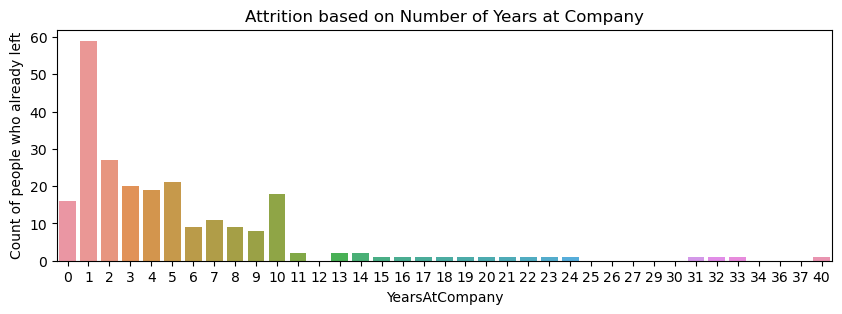

In [47]:
df2 = pd.DataFrame()
df2 = df1.groupby('YearsAtCompany')['Attrition'].value_counts().rename('count').reset_index()
df2 = df2[df2['Attrition']=='Yes']
plt.figure(figsize=(10,3))
sns.barplot(data=df2, x='YearsAtCompany', y='count')
plt.ylabel('Count of people who already left')
plt.title('Attrition based on Number of Years at Company');

* Employees with less than 11 years of experience tend to leave more.
* It might be a reason that they want to be more financially stable or they are looking for better job role.

### Visualization of Attrition Rate based on Number of companies worked:

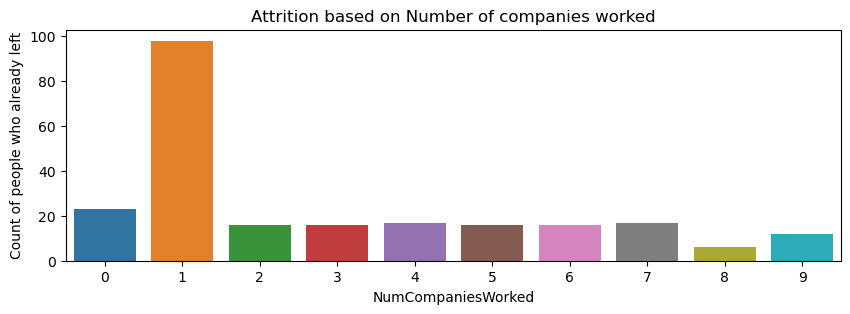

In [48]:
df2 = pd.DataFrame()
df2 = df1.groupby('NumCompaniesWorked')['Attrition'].value_counts().rename('count').reset_index()
df2 = df2[df2['Attrition']=='Yes']
plt.figure(figsize=(10,3))
sns.barplot(data=df2, x='NumCompaniesWorked', y='count')
plt.ylabel('Count of people who already left')
plt.title('Attrition based on Number of companies worked');

Employees who have spent more time on same company or they fall under junior level, tend to leave more.

### Visualization of Attrition Rate based on Total working years:

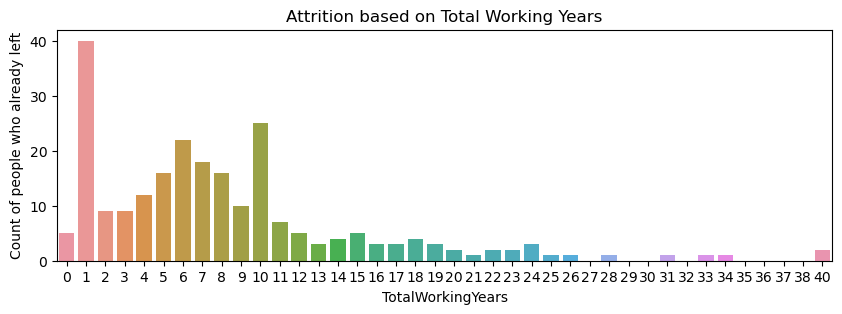

In [49]:
df2 = pd.DataFrame()
df2 = df1.groupby('TotalWorkingYears')['Attrition'].value_counts().rename('count').reset_index()
df2 = df2[df2['Attrition']=='Yes']
plt.figure(figsize=(10,3))
sns.barplot(data=df2, x='TotalWorkingYears', y='count')
plt.ylabel('Count of people who already left')
plt.title('Attrition based on Total Working Years');

Employees within their first 10 years of work experience, are highly prone towards attrition.

### Visualization of Attrition Rate based on Year since last promotion:

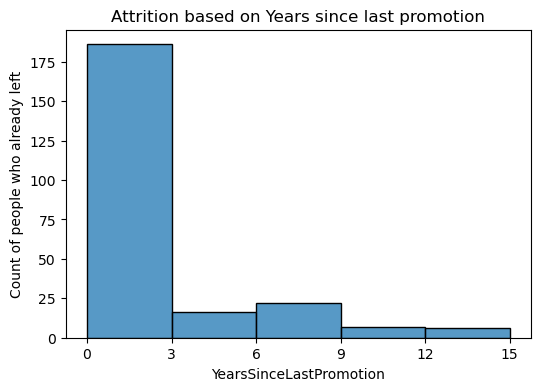

In [50]:
df2=pd.DataFrame()
df2 = df1[df1['Attrition']=='Yes']
plt.figure(figsize=(6,4))
sns.histplot(data=df2, x='YearsSinceLastPromotion', bins=[0,3,6,9,12,15])
plt.xticks([0,3,6,9,12,15])
plt.ylabel('Count of people who already left')
plt.title('Attrition based on Years since last promotion');

Employees who don't get promoted in last 3 years, have highest attrition rate.

### Visualization of Attrition Rate based on Training time last year:

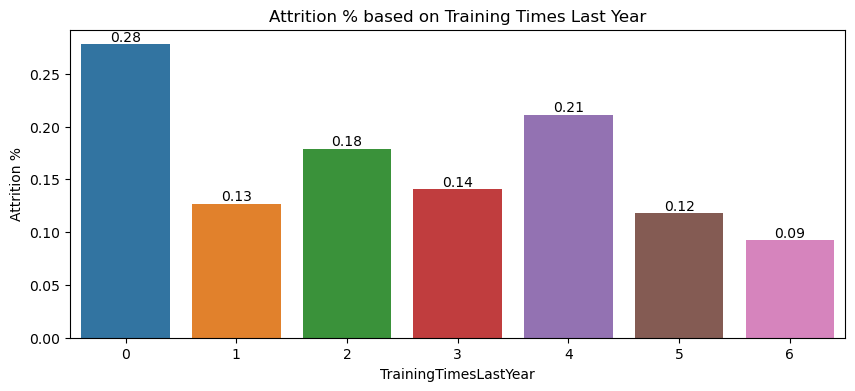

In [51]:
ax=0
df2 = pd.DataFrame()
df2 = df1.groupby('TrainingTimesLastYear')['Attrition'].value_counts(normalize=True).rename('count').reset_index()
df2 = df2[df2['Attrition']=='Yes']
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df2, x='TrainingTimesLastYear', y='count')
for c in ax.containers:
    label = [v.get_height() for v in c]
    ax.bar_label(c, labels=np.round(label,2))
plt.ylabel('Attrition %')
plt.title('Attrition % based on Training Times Last Year');

Training is also an important factor behind high attrition. Attrition percentage is very high when no training was conducted.

## EDA Summary:

### General Insights from Given Dataset:
* Ratio of people who stayed to people who left is 21:4. It clearly states that the given dataset is an imbalanced dataset.
* A large number of employees exist within the age range of 26-45 years. 
* There are more male employees compared to females.
* Attrition rate of males is slightly higher than females.
* Average monthly income for both males and females is same.
* As experience increases, monthly income also increases.
* Majority of employees have the basic educational qualification as Bachelor degree.
* HR department is having most stable work-life balance.
* Managers are having highest average monthly income.
* Every employee got the performance rating as either 'excellent' / 'outstanding'.

### Reasons behind Attrition:
* Younger people (between the ages 18 to 33 years / having work experience less than 11 years) are more likely to leave from organization. One reason is their monthly income falls into lower band (2000-6000). Another reason may be- they look for more opprotunities or they have not properly set their goal.
* Entry level employees show high attrition compared to the experienced ones. Reason may be: some of them are interns, so they look for full-time opportunities.
* Singles are more likely to leave compared to divorced & married employees. Since they have less life responsibilities; that's why may be singles are not stable.
* Employees having high job involvement & who have worked overtime leave the company most. It might be due to hectic work pressure, they feel less Job Satisfaction / poor work-life balance; which in turn increases attrition rate. 
* Employees who travelled frequently are more likely to leave. It might be a possible reason that either they are not getting proper travelling cost from company or the onsite facilities are not that much good.
* Employee with less stock option leave the company more often. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. On other hand, people with very limited/no stock option have a freedom to leave the organization at will.
* People who are not happy with their work environment, leave the company.
* Employees often leave company for long distance (> 8 km) from home to office. May be they are more sensative towards transportation cost.
* Employees who get average hike between 11% to 13% are leaving more compared to ones who are in high salary hike bracket. May be they have worked hard, but didn't get hike as per their expectation.
* Relationship Satisfaction is very similar to Environment Satisfaction. As the value of relationship satisfaction goes down, attrition rate increases.
* Employees who didn't get promoted in last 3 years, show highest tendency to leave the organization.
* In the business domains, where no training was conducted; there people have left most. It may happen that due to lack of training; they felt uncomfortable with assigned work.
* People who are having basic educational qualification as 'Below College'; either they find difficulty to continue their job or they plan for further studies. So, attrition rate for such employees are most.
* Employees with life science and medical degrees tend towards more attrition, it could be because the higher degree level are not very attached to company.
* Among 3 departments, Sales & HR departments are showing maximum attrition rate. Reasons are: in HR dept, monthly income range falls into lower bucket & in sales dept, there is hardly a good work-life balance.
* Among 9 different job roles, Attrition rate order is:<br>'Sales Representatives' > 'Laboratory Technician' > 'HR' > 'Sales Executive' <br> Reasons are: Sales Representative' having the lowest monthly income (<3000); Laboratory Technicians & Sales Executives job roles have long working hours; HRs were given far distant office location from their base town, as a result job satisfaction among them went down. 

### Preventive Measures to take against Attrition:
* HR dept has to think about strategy to retain younger talent, preventing attrition among younger employees. Organization can think about a regular survey for them to address their problems.
* Company should care more for employees’ satisfaction in joblevel, environment, work-life balance etc. as these are highly affecting the attrition rate.
* In those depts where workload / ovetime is too much, there company should reduce workload little bit and can give them free time to think about some innovation activities. It may help to reduce the attrition rate.
* There should be weekly internal meeting among teamleads & group members so that, individual problem (anyone is interested in changing team, regular workload etc.) can be addressed  and resolved quickly. 
* Since single people are leaving more, so company can think about a nice incentive plan for marriage purpose.
* Company should offer more stock options to its employees. It will strengthen partnership between employees and organization.
* Company should restrict their hiring process for those who are having basic educational qualification as 'below college' / having a higher degree of education.
* Organization should ensure that employees are getting best travel experience on the way of business tour.
* Company should think about salary restructuring based on market standard to reduce attrition.
* HR dept should look at the promotion & compensation policies, may be it is outdated.
* Company should provide posting to employees near (within 8 km.) to their base location.
* In each department; management should conduct training / kt sessions on a regular interval, so that employees are updated with relevant skillsets.
* Company really should appreciate their employees who stayed more than 10 years by giving them promotion / bonus.

**From EDA, we also understood that <u>Performance Rating</u> & <u>Relationship Satisfaction</u> are not that much important features. But before removal, we will check their correlation with other inputs & output feature. Also we will check feature importance of these features.**

### Feature Selection using F-Test:

In [52]:
# H0: features are not required for predicting y
# Ha: features are required for predicting y.
# p < 0.05; reject H0
# p > 0.05; accept H0

list1 = []
df2 = df3 = pd.DataFrame()
df2 = pd.get_dummies(df1, drop_first=True)

y = df2['Attrition_Yes']
x = df2.drop(['Attrition_Yes'], axis=1)

p_values = f_classif(x,y)[1]
p_vals = ['{:f}' .format(p) for p in p_values]
df3['Input Features'] = x.columns
df3['P values'] = [np.float64(p_val) for p_val in p_vals]
list1 = list(df3[df3['P values'] < 0.05]['Input Features'].values)
x = np.array([l.split('_')[0] for l in list1])
imp_input_features = np.unique(x)
print('Input Features List obtained after filtration= \n', imp_input_features)
print('\nCount of total important input features= ', len(imp_input_features))

a = df1.columns.to_list()
a.remove('Attrition')
for imp_cols in imp_input_features:
    a.remove(imp_cols)
print('\nEliminated Input Features are = \n', a)
print('\nCount of rejected input features= ', len(a))

Input Features List obtained after filtration= 
 ['Age' 'BusinessTravel' 'DailyRate' 'Department' 'DistanceFromHome'
 'EducationField' 'EnvironmentSatisfaction' 'JobInvolvement' 'JobLevel'
 'JobRole' 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome' 'OverTime'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsWithCurrManager']

Count of total important input features=  21

Eliminated Input Features are = 
 ['Education', 'Gender', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'YearsSinceLastPromotion']

Count of rejected input features=  9


### Visualization of Correlation between Categorical Features through Chi2 Test:

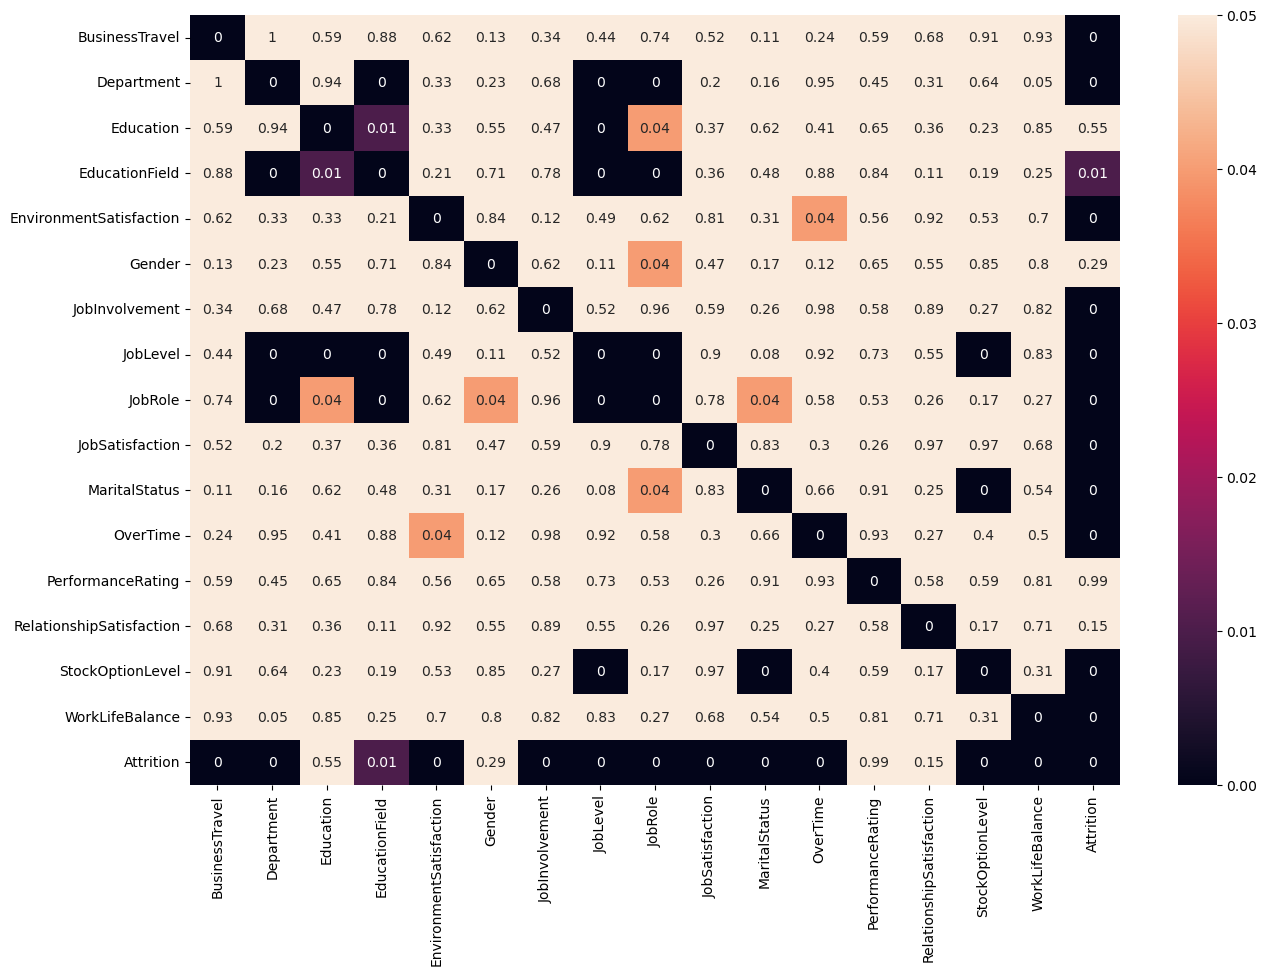

In [53]:
# Performing Chi2-Contingency test to check correlation between Categorical Features:
# H0: There is no relation between row feature & column feature.
# Ha: There is a relationship between row feature & column feature.
# p-value < 0.05 (95% confidence level) means there is a relationship between two catg features

a = np.zeros(shape=(len(categorical_cols),len(categorical_cols)))

for i in range(0,len(categorical_cols)):
    for j in range(0,len(categorical_cols)):
        temp_df = pd.DataFrame()
        temp_df = df1.groupby(categorical_cols[i])[categorical_cols[j]].value_counts().unstack()
        temp_df.fillna(0, inplace=True)
        a[i,j] = stats.chi2_contingency(observed=temp_df)[1]

plt.figure(figsize=(15,10))
sns.heatmap(np.round(a,2), annot=True, vmin=0, vmax=0.05)
ax = plt.gca()
ax.set_xticklabels(categorical_cols, rotation=90)
ax.set_yticklabels(categorical_cols, rotation = 0);

<u> Listing down obtained P Values: </u><br>
* Department & EducationField = 0 <br>
* Department & JobLevel = 0 <br>
* Department & JobRole = 0 <br>
* Education & EducationField = 0.01 <br>

Department, EducationField, JobLevel, JobRole, Education are having significant relationship correlation with Attrition.

### Visualization of Correlation Matrix for Numerical Input Columns:

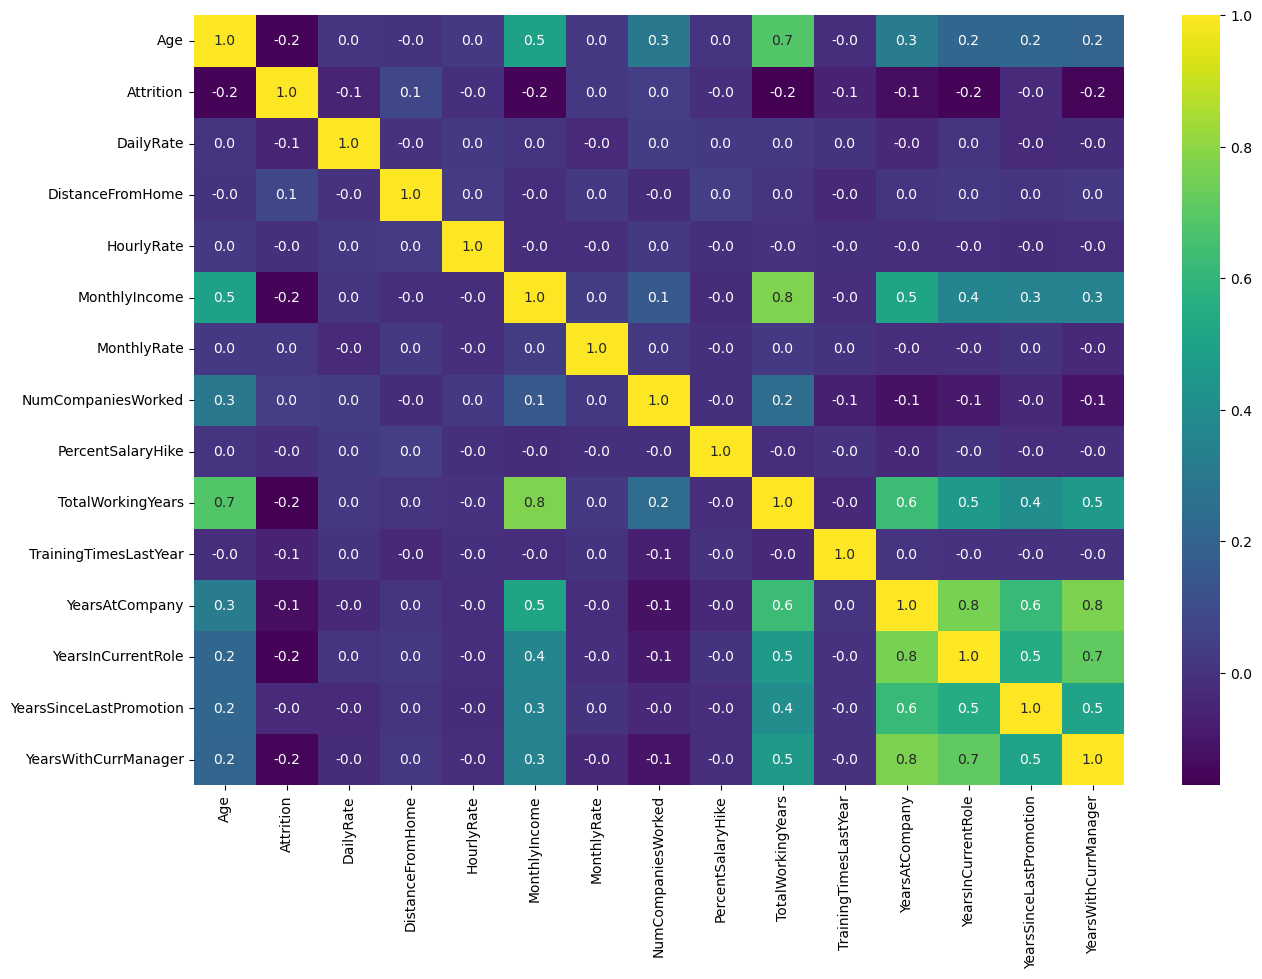

In [54]:
df2 = pd.DataFrame()
df2 = df1.drop(categorical_input_cols, axis=1)
df2['Attrition'] = df2['Attrition'].cat.codes 
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, fmt ='.1f', cmap='viridis');

<u> Listing down obtained Correlation-Coefficients: </u><br>
* Age(-0.2) & TotalWorkingYears(-0.2) = 0.7 <br>
* MonthlyIncome(-0.2) & TotalWorkingYears(-0.2) = 0.8 <br>
* YearsAtCompany(-0.1) & YearsInCurrentRole(-0.2) = 0.8 <br>
* YearsAtCompany(-0.1) & YearsWithCurrManager(-0.2) = 0.8 <br>
* YearsInCurrentRole(-0.2) & YearsWithCurrManager(-0.2) = 0.7 

All the above input features are having very less correlation with output feature.

### Finding Feature Importance:

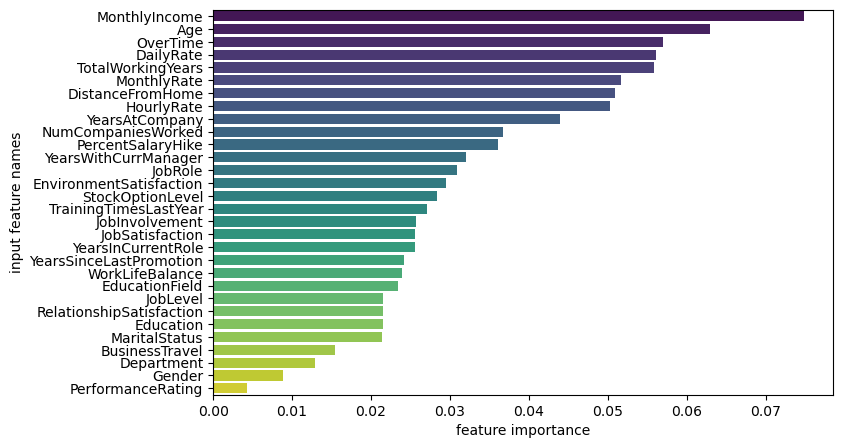

In [55]:
df2 = df3 = pd.DataFrame()
df2 = df1.copy()
for col in categorical_cols:
    if df2[col].dtype == 'category':
        df2[col] = df1[col].cat.codes
y1 = df2['Attrition']
x1 = df2.drop(['Attrition'], axis=1)
rfc1 = RandomForestClassifier(random_state=1234)
rfc1.fit(x1,y1)
df3['input feature names'] = x1.columns
df3['feature importance'] = rfc1.feature_importances_
df3.sort_values(by=['feature importance'], ascending=False, inplace=True)
plt.figure(figsize=(8,5))
sns.barplot(data=df3, y='input feature names', x='feature importance', orient='h', palette='viridis');

### Removing Performance Rating & Relationship Satisfaction from Dataframe:

In [56]:
df1.drop(['PerformanceRating', 'RelationshipSatisfaction'],axis=1, inplace=True)
print(df1.shape)

(1470, 29)


### Visualization of Outliers:

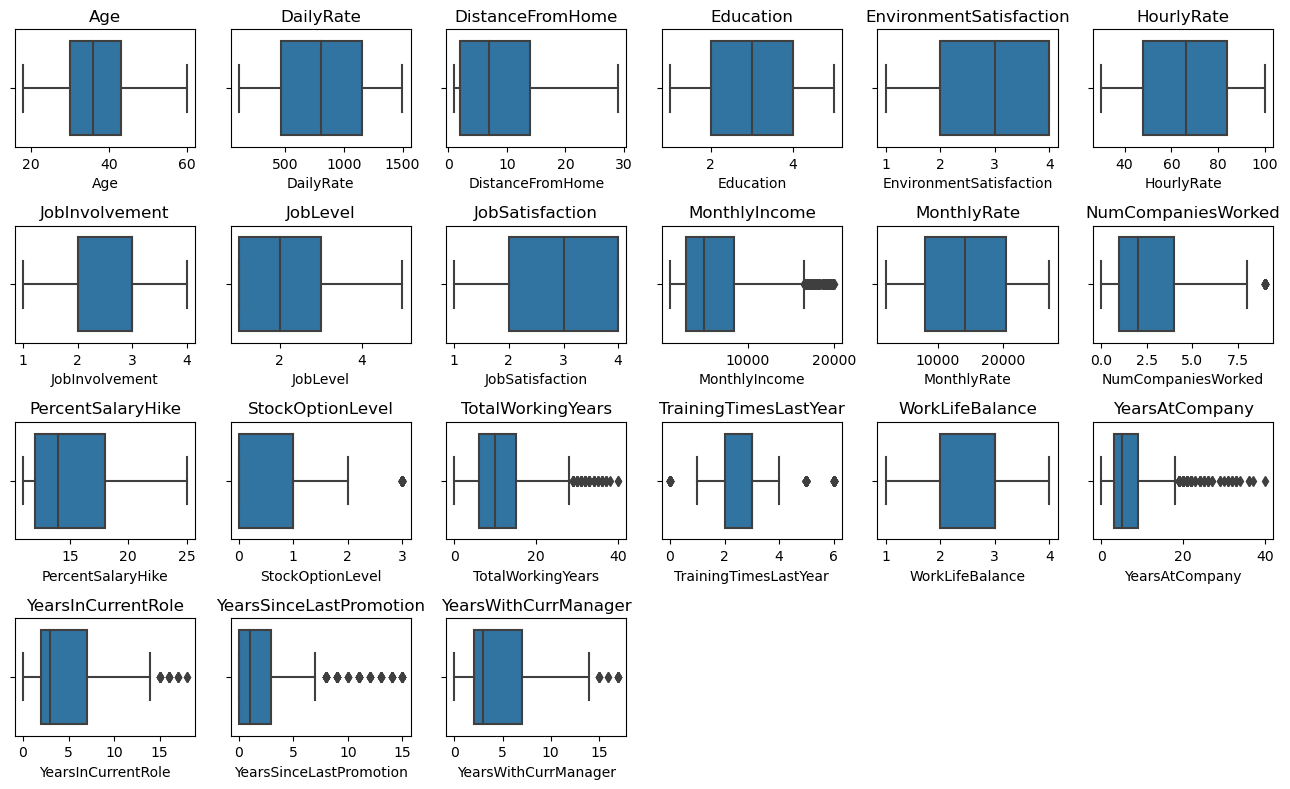

In [57]:
col = count = 0
plt.figure(figsize=(13,8))
for col in df1.columns:
    if df1[col].dtype == 'category':
        pass
    else:
        count = count + 1
        axi = plt.subplot(4,6,count)
        sns.boxplot(data=df1, x=col, ax=axi)
        axi.set_title('%s'%(col))
plt.tight_layout()
plt.show()

Though we can see presense of outliers for some fields; we will not remove / adjust them; rather we will keep them as it is.

### Splitting Input & Target Features:

In [58]:
y = df1['Attrition']
x = df1.drop(['Attrition'], axis=1)

### Train-Test Split:

In [59]:
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.3, stratify=y, random_state=1234)

### Performing Normalization on x_train:

In [60]:
stnd_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']   

In [61]:
scaler = StandardScaler()
x_train[stnd_cols] = scaler.fit_transform(x_train[stnd_cols])

### Performing One-Hot Encoding on x_train:

In [62]:
x_train = pd.get_dummies(x_train, drop_first=True)

### Performing One-hot Encoding on y_train:

In [63]:
y_train = pd.get_dummies(y_train, drop_first=True)['Yes']
# 'no'  is being coded as 0
# 'yes' is being coded as 1

### Performing Normalization on x_test:

In [64]:
x_test[stnd_cols] = scaler.transform(x_test[stnd_cols])

### Performing One-Hot Encoding on x_test:

In [65]:
x_test = pd.get_dummies(x_test, drop_first=True)

### Performing One-hot Encoding on y_test:

In [66]:
y_test

298      No
625      No
1349     No
1361     No
343      No
       ... 
1395    Yes
305      No
1256     No
553      No
392      No
Name: Attrition, Length: 441, dtype: category
Categories (2, object): ['No', 'Yes']

In [67]:
y_test = pd.get_dummies(y_test, drop_first=True)['Yes']
# 'no'  is being coded as 0
# 'yes' is being coded as 1

In [68]:
print('size of x: ', x.shape)

size of x:  (1470, 28)


In [69]:
print('size of x_train: ', x_train.shape)

size of x_train:  (1029, 42)


In [70]:
print('size of x_test: ', x_test.shape)

size of x_test:  (441, 42)


In [71]:
print('size of y: ', y.shape)

size of y:  (1470,)


In [72]:
print('size of y_train: ', y_train.shape)

size of y_train:  (1029,)


In [73]:
print('size of y_test: ', y_test.shape)

size of y_test:  (441,)


### Solution for Imbalanced Dataset (SMOTE):

In [74]:
y_train.value_counts()

0    863
1    166
Name: Yes, dtype: int64

* Class 0 stands for - People who stayed in organization <br>
* Class 1 stands for - People who left organization

In [75]:
# Applying SMOTE technique on training dataset:
smote = SMOTE(sampling_strategy='not majority', random_state=1234)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [76]:
print('Shape of x_train_smote = ', x_train_smote.shape)

Shape of x_train_smote =  (1726, 42)


In [77]:
print('Shape of y_train_smote = ', y_train_smote.shape)

Shape of y_train_smote =  (1726,)


In [78]:
y_train_smote.value_counts()

0    863
1    863
Name: Yes, dtype: int64

### User-Defined function to generate Model Accuracy Score & Classification Report:

In [79]:
def classification_report(y_true, y_pred):
    cm = ps = rc = f1 = 0
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    ps = precision_score(y_true, y_pred)
    rc = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return cm, acc, ps, rc, f1

### User defined function to visualize Confusion Matrix:

In [80]:
def plot_confusion_matrix(cmatrix,color,ratio):
    ax = i = j = 0
    plt.figure()
    ax = plt.imshow(cmatrix, cmap=color, aspect=ratio)
    plt.tick_params(bottom=False, labelbottom=False, labeltop=True)
    plt.xticks(range(0,2),['0\npeople who stayed','1\npeople who left'])
    plt.yticks(range(0,2),['0              \npeople who stayed','1            \npeople who left'])
    for i in range(0,cmatrix.shape[0]):
        for j in range(0,cmatrix.shape[1]):
            plt.text(j,i,cmatrix[i][j], ha='center', va = 'center')
    plt.title('Predicted')
    plt.ylabel('Actual', fontsize=12)
    plt.axvline(x=0.5, c='black')
    plt.axhline(y=0.5, c='black')
    plt.annotate(text='TN', xy=(0.4,0.4))
    plt.annotate(text='FP', xy=(1.4,0.4))
    plt.annotate(text='FN', xy=(0.4,1.4))
    plt.annotate(text='TP', xy=(1.4,1.4))
    plt.show()

### User defined function to plot AUC-ROC Curve:

In [81]:
def plot_auc_roc_curve(Y_Test, Prob_Values, fsize):
    fpr = tpr = thresholds = auc_score = 0
    fpr, tpr, thresholds = roc_curve(Y_Test, Prob_Values)
    plt.figure(figsize=fsize)
    plt.plot(fpr,tpr,'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    auc_score = roc_auc_score(Y_Test, Prob_Values)
    plt.title('ROC Curve\nAUC score = %s' %(np.round(auc_score,4)))
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.show()
    return fpr, tpr, thresholds

### Performing Normalization & One-Hot Encoding on entire x & y for Cross-Validation Purpose:

In [82]:
scaler1 = StandardScaler()
x[stnd_cols] = scaler1.fit_transform(x[stnd_cols])

In [83]:
x = pd.get_dummies(x, drop_first=True)

In [84]:
y = pd.get_dummies(y, drop_first=True)['Yes']
# 'no'  is being coded as 0
# 'yes' is being coded as 1

# 1. Applying Logistic Regression:

In [85]:
lr = LogisticRegression(solver='lbfgs',max_iter=9000)
lr.fit(x_train_smote, y_train_smote)
y_pred_lr_test = lr.predict(x_test)
y_pred_lr_train = lr.predict(x_train_smote)

# probability of being classified as class 1 (Attrition-Yes)
y_prob_lr_train = lr.predict_proba(x_train_smote)[:,1]
y_prob_lr_test = lr.predict_proba(x_test)[:,1]

cm_lr, accuracy_lr, precision_lr, recall_lr, f1_lr = classification_report(y_test, y_pred_lr_test)

accuracy_lr_train = classification_report(y_train_smote, y_pred_lr_train)[1]

print('Train Accuracy: ', accuracy_lr_train)
print('Test Accuracy : ', accuracy_lr)

Train Accuracy:  0.8922363847045192
Test Accuracy :  0.8526077097505669


### Coefficent Values:

In [86]:
print('Intercept Term = ', lr.intercept_[0])
print('\nOther Coefficients = \n', lr.coef_)

Intercept Term =  12.835482999089178

Other Coefficients = 
 [[-0.03393596 -0.11274904  0.20766733 -0.47265079 -0.46289746  0.05858839
  -0.62166051 -0.92063504 -0.37951514  0.56768797 -0.01878281  0.32990839
  -0.06118701 -0.52439582 -0.60913405 -0.25483338 -0.54918273  0.41728939
  -0.17363802  0.35532532 -0.24344303 -0.17886604 -0.55131318 -1.78327384
  -0.35120947 -2.55536673 -2.15193447 -2.78329865 -2.8211963  -2.00616594
  -0.11650544 -3.36461612 -0.37719627 -1.39971945 -1.21901914 -1.49579051
  -1.39686108 -1.43215537 -1.46575766 -0.65516234 -0.16867699  1.11452817]]


### Logistic Regression Confusion Matrix:

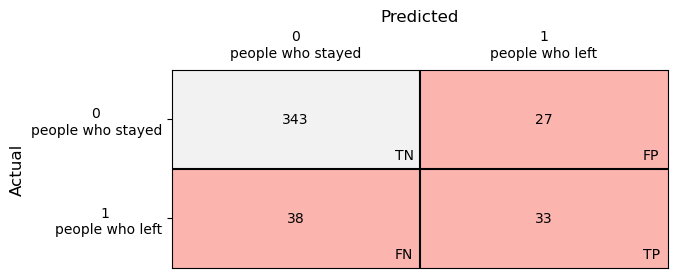

Precision value =  0.55
Recall value    =  0.4647887323943662
F1 score        =  0.5038167938931297


In [87]:
plot_confusion_matrix(cm_lr,'Pastel1',0.4)
print('Precision value = ', precision_lr)
print('Recall value    = ', recall_lr)
print('F1 score        = ', f1_lr)

Since, we want to resist attrition may be Organization wishes to reduce <br>FN (Actual:1 & Predicted:0 - where people actually left; but our model predicted them to be stayed in company)

### Logistic Regression ROC Curve:

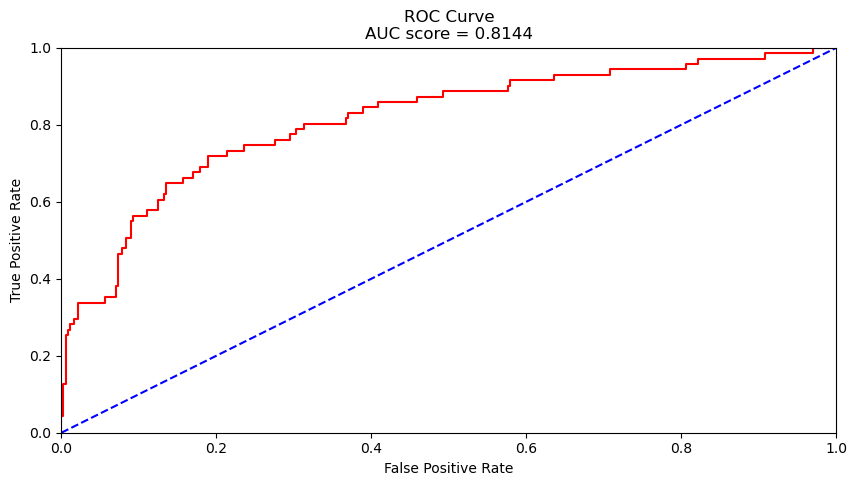

In [88]:
lr_fpr, lr_tpr, lr_thresholds = plot_auc_roc_curve(y_test, y_prob_lr_test, (10,5))

### Adjusting Threshold Value in Logistic Regression to reduce False Negatives:

In [89]:
threshold_vals = np.arange(0,1,0.1)
lr_train_accuracy = []
lr_test_accuracy = []
lr_test_FN = []
lr_train_FN = []
for th in threshold_vals:
    new_threshold = th
    i = j = lr_test_accuracy_score = lr_train_accuracy_score = 0
    y_pred_new_lr_test = []
    y_pred_new_lr_train = []
    for i in range(0,len(y_prob_lr_test)):
        if y_prob_lr_test[i] > new_threshold:
            y_pred_new_lr_test.append(1)
        else:
            y_pred_new_lr_test.append(0)
    lr_test_accuracy_score = accuracy_score(y_test, y_pred_new_lr_test)
    lr_test_accuracy.append(lr_test_accuracy_score)
    lr_test_df = pd.DataFrame()
    lr_test_df['y_test'] = y_test
    lr_test_df['prob_vals'] = y_prob_lr_test
    lr_test_df['threshold'] = th
    lr_test_df['y_test_predicted'] = y_pred_new_lr_test
    lr_test_df.reset_index(inplace=True, drop=True)
    FN = lr_test_df[(lr_test_df['y_test'] == 1) & (lr_test_df['y_test_predicted'] == 0)].shape[0]
    lr_test_FN.append(FN)
    
    for j in range(0,len(y_prob_lr_train)):
        if y_prob_lr_train[j] > new_threshold:
            y_pred_new_lr_train.append(1)
        else:
            y_pred_new_lr_train.append(0)
    lr_train_accuracy_score = accuracy_score(y_train_smote, y_pred_new_lr_train)
    lr_train_accuracy.append(lr_train_accuracy_score)

lr_combined_df = pd.DataFrame()
lr_combined_df['threshold'] = threshold_vals
lr_combined_df['train_accuracy'] = lr_train_accuracy
lr_combined_df['test_accuracy'] = lr_test_accuracy
lr_combined_df['no_of_test_FN'] = lr_test_FN
lr_combined_df.set_index('threshold', inplace=True)
lr_combined_df

,train_accuracy,test_accuracy,no_of_test_FN
threshold,,,
0.0,0.500000,0.160998,0
0.1,0.707416,0.548753,8
0.2,0.795481,0.696145,14
0.3,0.847625,0.793651,21
0.4,0.882387,0.832200,28
0.5,0.892236,0.852608,38
0.6,0.884125,0.845805,46
0.7,0.873696,0.873016,48
0.8,0.849942,0.873016,54


we got that, optimal threshold value should be >0.3 but less than 0.4 to achieve the minimum False Negative value; considering a balanced Train & Test Accuracy Score.

### Setting new threshold value as 0.3 to achieve minimum False Negative value:

Test Accuracy at threshold 0.3  = 0.79
Train Accuracy at threshold 0.3 = 0.85


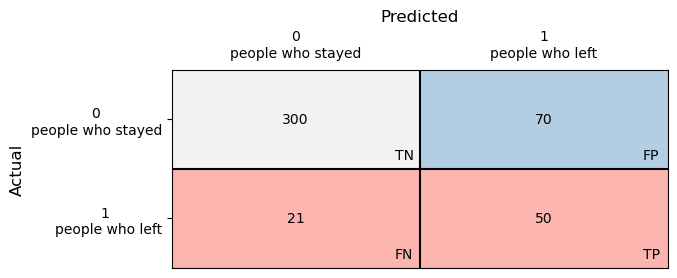

Precision value =  0.4166666666666667
Recall value    =  0.704225352112676
F1 score        =  0.5235602094240838


In [90]:
new_threshold = 0.3
y_pred_new_lr = []
i = a = 0
for i in range(0,len(y_prob_lr_test)):
    if y_prob_lr_test[i] > new_threshold:
        y_pred_new_lr.append(1)
    else:
        y_pred_new_lr.append(0)

cm_new_lr, accuracy_new_lr, precision_new_lr, recall_new_lr, f1_new_lr = \
classification_report(y_test, y_pred_new_lr)

print('Test Accuracy at threshold {}  = {}'.format(new_threshold, np.round(accuracy_new_lr,2)))

y_pred_thr = []
for i in range(0, len(y_prob_lr_train)):
    if y_prob_lr_train[i] > new_threshold:
        y_pred_thr.append(1)
    else:
        y_pred_thr.append(0)

a = accuracy_score(y_train_smote, y_pred_thr)
print('Train Accuracy at threshold {} = {}'.format(new_threshold,np.round(a,2)))
plot_confusion_matrix(cm_new_lr,'Pastel1',0.4)
print('Precision value = ', precision_new_lr)
print('Recall value    = ', recall_new_lr)
print('F1 score        = ', f1_new_lr)

### Stratified k-fold cross validation for Logistic Regression:

In [91]:
lr_1 = LogisticRegression(max_iter=9000)
skfold = StratifiedKFold(n_splits=10)
lr_cv = cross_validate(lr_1,x,y,scoring='accuracy',cv=skfold,return_train_score=True)
print('Minimum training score = ', lr_cv['train_score'].min())
print('Maximum training score = ', lr_cv['train_score'].max())
print('Average training score = {} %' .format(lr_cv['train_score'].mean()*100))
print('\nMinimum test score     = ', lr_cv['test_score'].min())
print('Maximum test score     = ', lr_cv['test_score'].max())
print('Average test score     = {} %' .format(lr_cv['test_score'].mean()*100))

Minimum training score =  0.8888888888888888
Maximum training score =  0.8994708994708994
Average training score = 89.25170068027212 %

Minimum test score     =  0.8503401360544217
Maximum test score     =  0.9183673469387755
Average test score     = 88.43537414965986 %


Since, difference between max & min accuracy is less; so we will not perform any hyper-parameter tuning for Logistic Regression.

# 2. Applying KNN:

### Trying to find optimal k value:

Optimal K value =  96
Difference between train & test accuracy =  14.05


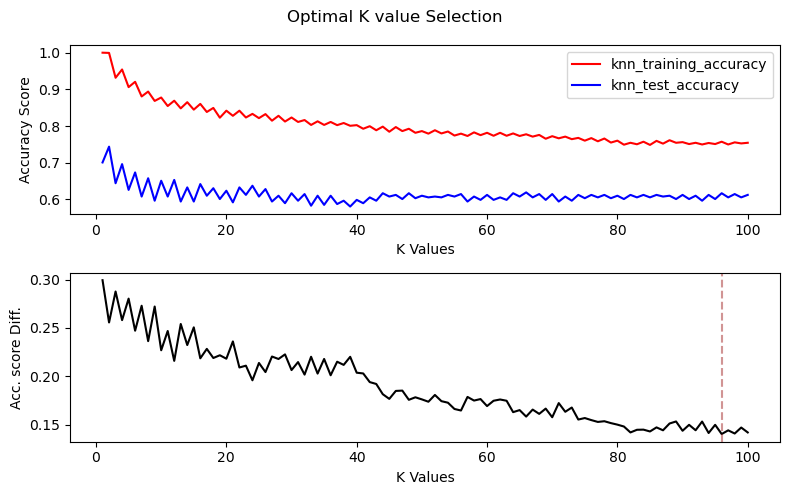

In [92]:
knn_train_accuracy = []
knn_test_accuracy = []
k_range = range(1,101)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_smote,y_train_smote)
    knn_train_accuracy.append(classification_report(y_train_smote, knn.predict(x_train_smote))[1])
    knn_test_accuracy.append(classification_report(y_test, knn.predict(x_test))[1])

plt.figure(figsize=(8,5))
ax1 = plt.subplot(2,1,1)
ax1.plot(k_range,knn_train_accuracy,'r-', label='knn_training_accuracy')
ax1.plot(k_range,knn_test_accuracy, 'b-', label='knn_test_accuracy')
ax1.set_xlabel('K Values')
ax1.set_ylabel('Accuracy Score')
ax1.legend()

ax2 = plt.subplot(2,1,2)
acc_diff_knn = np.array(knn_train_accuracy) - np.array(knn_test_accuracy)
min_value = np.array(acc_diff_knn).min()
counter = index = i = d = 0
for i,d in enumerate(acc_diff_knn):
    if ((d == min_value) & (counter==0)):
        counter = counter + 1
        index = i+1
        
ax2.plot(k_range, acc_diff_knn, 'k-')
ax2.set_xlabel('K Values')
ax2.set_ylabel('Acc. score Diff.')
ax2.axvline(x=index, c='brown', alpha=0.5, ls='--')
plt.suptitle('Optimal K value Selection')
plt.tight_layout();

print('Optimal K value = ', index)
print('Difference between train & test accuracy = ', np.round(min_value*100,2))

The above graph clearly shows, our KNN model is reflecting overfitting condition. Still optimal k value obtained is 88.

### KNN Hyperparamter Tuning (GridSearchCV):

In [93]:
knn_2 = KNeighborsClassifier()
knn_params = {'n_neighbors':list(np.arange(88,96)), 'p':[1,2]}
knn_grid_result =   GridSearchCV(estimator=knn_2, 
                                 param_grid=knn_params, 
                                 scoring='accuracy', 
                                 cv=10,
                                 return_train_score=True)
knn_grid_result.fit(x_train_smote, y_train_smote)
print('Optimum Parameters: ', knn_grid_result.best_params_)

Optimum Parameters:  {'n_neighbors': 88, 'p': 1}


p = 1, is equivalent to using manhattan_distance.

### KNN model with optimized K value:

In [94]:
knn_1 = KNeighborsClassifier(n_neighbors=94, p=1)
knn_1.fit(x_train_smote, y_train_smote)
y_prob_knn_test = knn_1.predict_proba(x_test)[:,1]
cm_knn, knn_test_acc, precision_knn, recall_knn, f1_knn = \
classification_report(y_test, knn_1.predict(x_test))

knn_accuracy_train = classification_report(y_train_smote, knn_1.predict(x_train_smote))[1]

print('Train Accuracy: ', knn_accuracy_train)
print('Test Accuracy : ', knn_test_acc)

Train Accuracy:  0.7943221320973349
Test Accuracy :  0.671201814058957


### KNN Confusion Matrix:

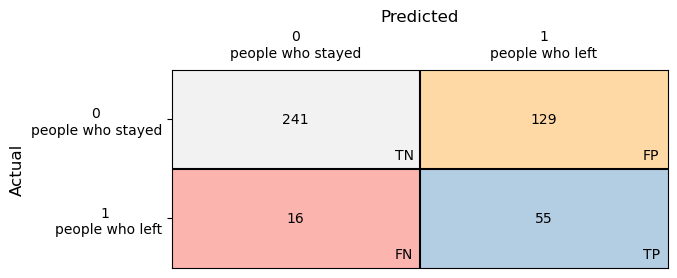

Precision value =  0.29891304347826086
Recall value    =  0.7746478873239436
F1 score        =  0.43137254901960786


In [95]:
plot_confusion_matrix(cm_knn,'Pastel1',0.4)
print('Precision value = ', precision_knn)
print('Recall value    = ', recall_knn)
print('F1 score        = ', f1_knn)

### KNN ROC curve:

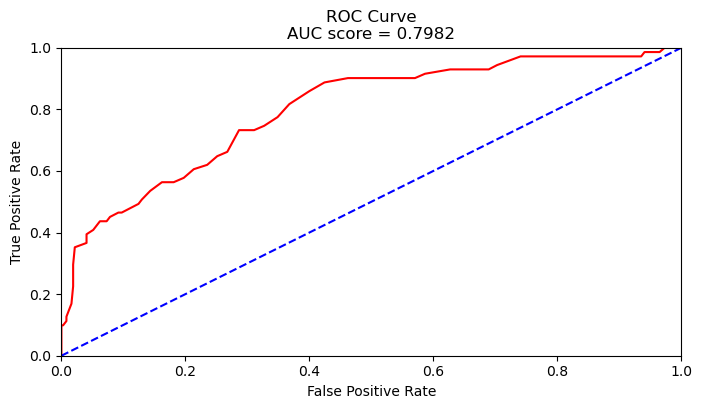

In [96]:
knn_fpr, knn_tpr, knn_thresholds = plot_auc_roc_curve(y_test, y_prob_knn_test, (8,4))

# 3. Applying SVM:

In [97]:
svc = SVC(random_state=1234, probability=True)
svc.fit(x_train_smote, y_train_smote)
y_pred_svm_test = svc.predict(x_test)
y_prob_svm_test = svc.predict_proba(x_test)[:,1]
svc_train_acc = svc.score(x_train_smote, y_train_smote)
svc_test_acc = svc.score(x_test, y_test)
svc_cm, svc_accuracy, svc_precision, svc_recall, svc_f1 = \
classification_report(y_test, y_pred_svm_test)
print('train accuracy = ', svc_train_acc)
print('test  accuracy = ', svc_test_acc)

train accuracy =  0.9269988412514485
test  accuracy =  0.8458049886621315


### SVM Confusion Matrix:

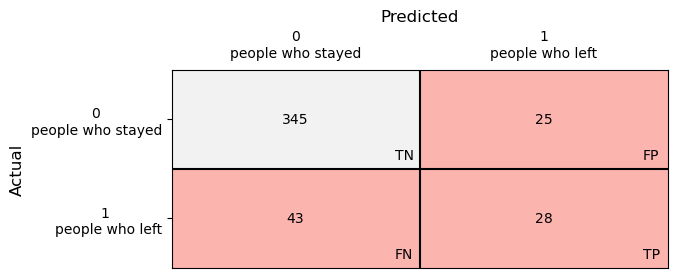

Precision value =  0.5283018867924528
Recall value    =  0.39436619718309857
F1 score        =  0.4516129032258064


In [98]:
plot_confusion_matrix(svc_cm,'Pastel1',0.4)
print('Precision value = ', svc_precision)
print('Recall value    = ', svc_recall)
print('F1 score        = ', svc_f1)

### SVM ROC Curve:

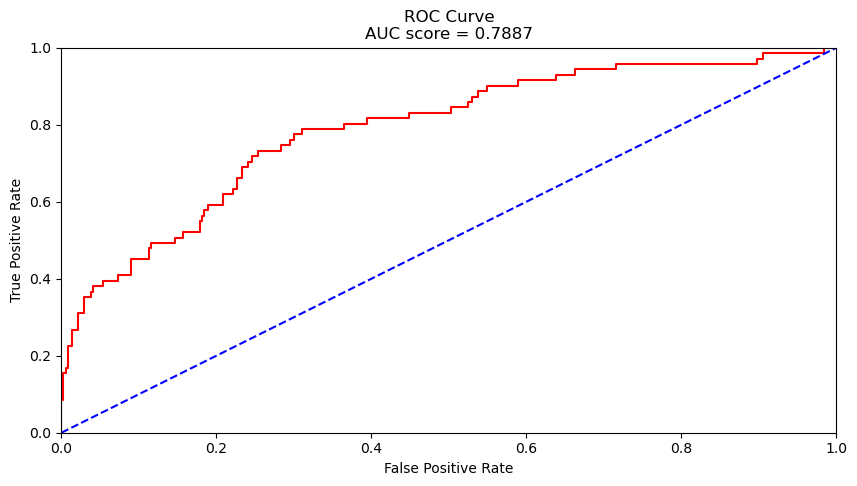

In [99]:
svc_fpr, svc_tpr, svc_thresholds = plot_auc_roc_curve(y_test, y_prob_svm_test, (10,5))

### K-fold Cross Validation for SVM: 

In [100]:
svc_1 = SVC()
skfold_svc = StratifiedKFold(n_splits=10)
svc_cv = cross_validate(svc_1,x,y,scoring='accuracy',cv=skfold_svc,return_train_score=True)
print('Minimum training score = ', svc_cv['train_score'].min())
print('Maximum training score = ', svc_cv['train_score'].max())
print('Average training score = {} %' .format(svc_cv['train_score'].mean()*100))
print('\nMinimum test score     = ', svc_cv['test_score'].min())
print('Maximum test score     = ', svc_cv['test_score'].max())
print('Average test score     = {} %' .format(svc_cv['test_score'].mean()*100))

Minimum training score =  0.8639455782312925
Maximum training score =  0.8752834467120182
Average training score = 86.87074829931973 %

Minimum test score     =  0.8435374149659864
Maximum test score     =  0.8707482993197279
Average test score     = 85.78231292517006 %


Since, difference between max & min accuracy is less; so we will not perform any hyper-parameter tuning for SVM.

### Hyperparameter Tuning of SVM (GridSearchCV):

In [101]:
svc_params = {'C': [0.01,0.1,0.5,1,5],
              'kernel': ['rbf', 'linear'],
              'gamma': [0.01,1,5]}

svc_2 = SVC()

svc_grid_cv = GridSearchCV(estimator = svc_2, 
                           param_grid = svc_params, 
                           scoring='accuracy', 
                           cv=10, 
                           return_train_score=True)

svc_grid_cv.fit(x_train_smote, y_train_smote)

print('Optimum Parameters: ', svc_grid_cv.best_params_)

Optimum Parameters:  {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


### SVM model with Optimized Hyperparameter:

In [102]:
svc_final = SVC(C=5, kernel='rbf', gamma=0.01, probability=True)
svc_final.fit(x_train_smote, y_train_smote)
y_pred_svm_test_final = svc_final.predict(x_test)
y_prob_svm_test_final = svc_final.predict_proba(x_test)[:,1]
svc_train_acc_final = svc_final.score(x_train_smote, y_train_smote)
svc_test_acc_final = svc_final.score(x_test, y_test)
svm_cm, svm_accuracy, svm_precision, svm_recall, svm_f1 = \
classification_report(y_test, y_pred_svm_test_final)
print('train accuracy = ', svc_train_acc_final)
print('test  accuracy = ', svc_test_acc_final)

train accuracy =  0.9345307068366164
test  accuracy =  0.8594104308390023


### Confusion Matrix w.r.t optimized SVC:

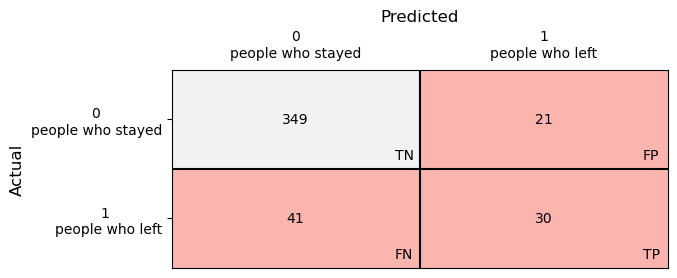

Precision value =  0.5882352941176471
Recall value    =  0.4225352112676056
F1 score        =  0.49180327868852464


In [103]:
plot_confusion_matrix(svm_cm,'Pastel1',0.4)
print('Precision value = ', svm_precision)
print('Recall value    = ', svm_recall)
print('F1 score        = ', svm_f1)

### R.O.C w.r.t optimized SVC:

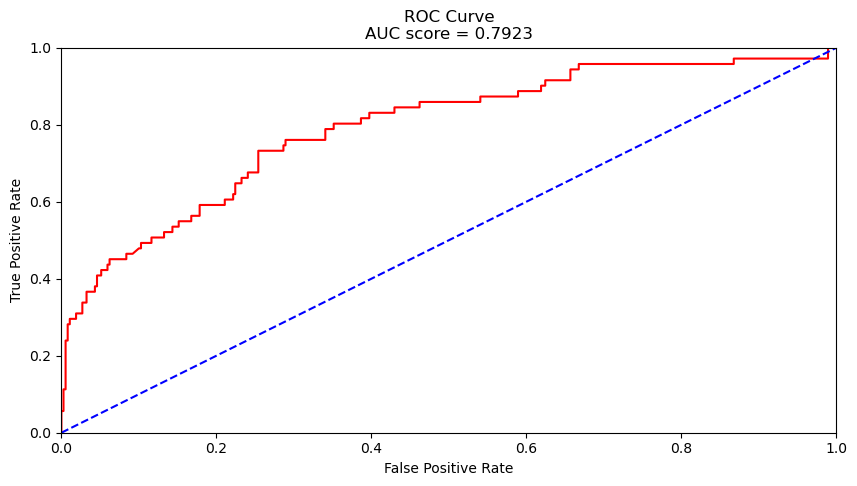

In [104]:
svm_fpr, svm_tpr, svm_thresholds = plot_auc_roc_curve(y_test, y_prob_svm_test_final, (10,5))

# 4. Applying Decision Tree:

In [105]:
dtc = DecisionTreeClassifier(random_state=1234)
dtc.fit(x_train_smote, y_train_smote)
y_pred_dtc_train = dtc.predict(x_train_smote)
y_pred_dtc_test = dtc.predict(x_test)
y_prob_dtc_test = dtc.predict_proba(x_test)[:,1]
cm_dtc, accuracy_dtc, precision_dtc, recall_dtc, f1_dtc = \
classification_report(y_test, y_pred_dtc_test)
print('Train Accuracy: ', classification_report(y_train_smote, y_pred_dtc_train)[1])
print('Test Accuracy : ', accuracy_dtc)

Train Accuracy:  1.0
Test Accuracy :  0.7392290249433107


from here, clearly we can see our model is showing Overfitting Scenario.

### Performing Cross Validation on Decision Tree Classifier:

In [106]:
dtc_1 = DecisionTreeClassifier()
skfold_dtc = StratifiedKFold(n_splits=10)
dtc_cv = \
cross_validate(dtc_1, x, y, scoring='accuracy', cv=skfold_dtc, return_train_score=True)
print('Minimum training score = ', dtc_cv['train_score'].min())
print('Maximum training score = ', dtc_cv['train_score'].max())
print('Average training score = {} %' .format(dtc_cv['train_score'].mean()*100))
print('\nMinimum test score     = ', dtc_cv['test_score'].min())
print('Maximum test score     = ', dtc_cv['test_score'].max())
print('Average test score     = {} %' .format(dtc_cv['test_score'].mean()*100))

Minimum training score =  1.0
Maximum training score =  1.0
Average training score = 100.0 %

Minimum test score     =  0.782312925170068
Maximum test score     =  0.8231292517006803
Average test score     = 79.8639455782313 %


### Hyperparameter tuning of Decision Tree Classifier (RandomizedSearchCV):

In [107]:
dtc_2 = DecisionTreeClassifier(random_state=1234)

dtc_params = {'criterion':['gini','entropy'], 
              'splitter':['best', 'random'], 
              'max_depth':[2,3,5,10,15], 
              'min_samples_leaf':[5,10,11,12]}

random_search = RandomizedSearchCV(estimator=dtc_2, 
                                   param_distributions=dtc_params,
                                   n_iter=10,
                                   scoring='accuracy', 
                                   cv=10, 
                                   random_state=1234, 
                                   return_train_score=True)

random_search.fit(x_train_smote, y_train_smote)
random_search.best_params_

{'splitter': 'random',
 'min_samples_leaf': 10,
 'max_depth': 15,
 'criterion': 'entropy'}

### Decision Tree Classifier with Optimized Hyperparameter:

In [108]:
dtc_3 = DecisionTreeClassifier(random_state=1234, 
                               criterion='entropy', 
                               splitter='random', 
                               max_depth=15, 
                               min_samples_leaf=10)
dtc_3.fit(x_train_smote, y_train_smote)
y_pred_dtc3_train = dtc_3.predict(x_train_smote)
y_pred_dtc3_test = dtc_3.predict(x_test)
y_prob_dtc3_test = dtc_3.predict_proba(x_test)[:,1]
cm_dtc3, accuracy_dtc3, precision_dtc3, recall_dtc3, f1_dtc3 = \
classification_report(y_test, y_pred_dtc3_test)
accuracy_dtc3_train = classification_report(y_train_smote, y_pred_dtc3_train)[1]

print('Train Accuracy: ', accuracy_dtc3_train)
print('Test Accuracy : ', accuracy_dtc3)

Train Accuracy:  0.8835457705677868
Test Accuracy :  0.7981859410430839


### Confusion Matrix wrt Optimized DTC:

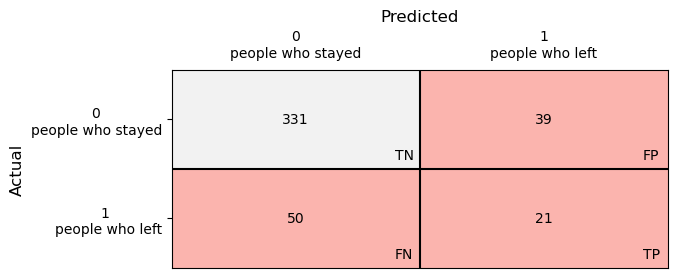

Precision value =  0.35
Recall value    =  0.29577464788732394
F1 score        =  0.32061068702290074


In [109]:
plot_confusion_matrix(cm_dtc3,'Pastel1',0.4)
print('Precision value = ', precision_dtc3)
print('Recall value    = ', recall_dtc3)
print('F1 score        = ', f1_dtc3)

### ROC wrt Optimized DTC:

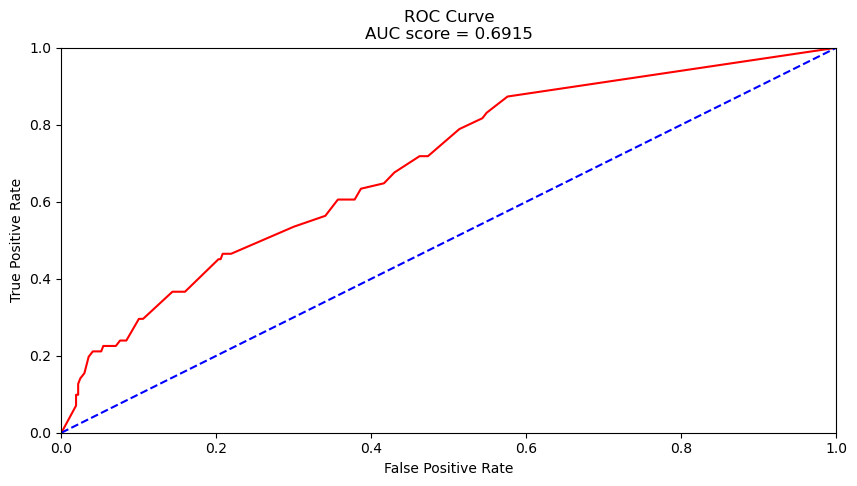

In [110]:
dtc_fpr, dtc_tpr, dtc_thresholds = plot_auc_roc_curve(y_test, y_prob_dtc3_test, (10,5))

# 5. Applying Random Forest:

In [111]:
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(x_train_smote, y_train_smote)
y_pred_rfc_train = rfc.predict(x_train_smote)
y_pred_rfc_test = rfc.predict(x_test)
y_prob_rfc_test = rfc.predict_proba(x_test)[:,1]
cm_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc = \
classification_report(y_test, y_pred_rfc_test)
print('Train Accuracy: ', classification_report(y_train_smote, y_pred_rfc_train)[1])
print('Test Accuracy : ', accuracy_rfc)

Train Accuracy:  1.0
Test Accuracy :  0.854875283446712


from here, clearly we can see our model is showing Overfitting Scenario.

### Hyperparameter tuning of Random Forest Classifier (RandomizedSearchCV):

In [112]:
rfc_1 = RandomForestClassifier(random_state=1234)

rfc_params = {'n_estimators':[10,20,24,35,50], 
              'max_depth': [2,6,15],
              'min_samples_split':[4,10,20], 
              'min_samples_leaf':[7,8]}

random_search_rfc = RandomizedSearchCV(estimator=rfc_1, 
                                       param_distributions=rfc_params,
                                       n_iter=10,
                                       scoring='accuracy', 
                                       cv=10, 
                                       random_state=1234, 
                                       return_train_score=True)

random_search_rfc.fit(x_train_smote, y_train_smote)
random_search_rfc.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_depth': 15}

### Random Forest wrt Optimized Hyperparameters:

In [113]:
rfc_2 = RandomForestClassifier(n_estimators=50, 
                               min_samples_split=10,
                               min_samples_leaf=8,
                               max_depth=15,
                               random_state=1234)
rfc_2.fit(x_train_smote, y_train_smote)
y_pred_rfc2_train = rfc_2.predict(x_train_smote)
y_pred_rfc2_test = rfc_2.predict(x_test)
y_prob_rfc2_test = rfc_2.predict_proba(x_test)[:,1]
cm_rfc2, accuracy_rfc2, precision_rfc2, recall_rfc2, f1_rfc2 = \
classification_report(y_test, y_pred_rfc2_test)
accuracy_rfc2_train = classification_report(y_train_smote, y_pred_rfc2_train)[1]

print('Train Accuracy: ', accuracy_rfc2_train)
print('Test Accuracy : ', accuracy_rfc2)

Train Accuracy:  0.9536500579374276
Test Accuracy :  0.8571428571428571


### Confusion Matrix wrt Optimized RFC:

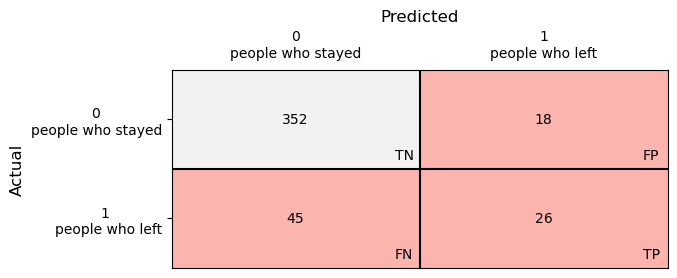

Precision value =  0.5909090909090909
Recall value    =  0.36619718309859156
F1 score        =  0.45217391304347826


In [114]:
plot_confusion_matrix(cm_rfc2,'Pastel1',0.4)
print('Precision value = ', precision_rfc2)
print('Recall value    = ', recall_rfc2)
print('F1 score        = ', f1_rfc2)

### ROC Curve wrt Optimized RFC:

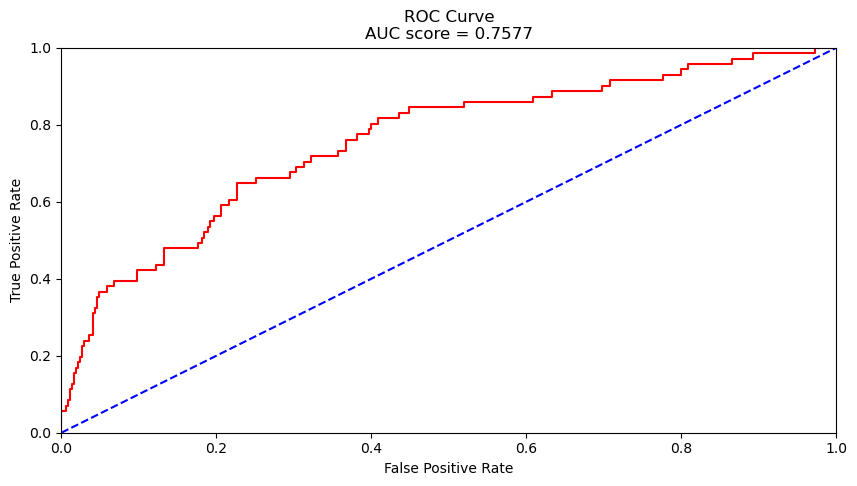

In [115]:
rfc_fpr, rfc_tpr, rfc_thresholds = plot_auc_roc_curve(y_test, y_prob_rfc2_test, (10,5))

# Summary of Machine Learning Models :

In [116]:
summary_df = pd.DataFrame()
summary_df['model'] = ['logistic regression', 'knn', 'svm', 'decision tree', 'random forest']

l1 = np.round(np.array([accuracy_lr_train, knn_accuracy_train, svc_train_acc_final, accuracy_dtc3_train, accuracy_rfc2_train]),2)
summary_df['train_accuracy'] = l1

l2 = np.round(np.array([accuracy_lr, knn_test_acc, svc_test_acc_final, accuracy_dtc3, accuracy_rfc2]),2)
summary_df['test_accuracy'] = l2

l3 = np.round(np.array([recall_lr, recall_knn, svm_recall, recall_dtc3, recall_rfc2]),2)
summary_df['recall'] = l3

l4 = [cm_lr[1][0], cm_knn[1][0], svm_cm[1][0], cm_dtc3[1][0], cm_rfc2[1][0]]
summary_df['FN'] = l4

In [117]:
summary_df

,model,train_accuracy,test_accuracy,recall,FN
0,logistic regression,0.89,0.85,0.46,38
1,knn,0.79,0.67,0.77,16
2,svm,0.93,0.86,0.42,41
3,decision tree,0.88,0.80,0.30,50
4,random forest,0.95,0.86,0.37,45


#### more the value of recall, less the value of FN